## Number of detectable and mappable xQTL loci in single−context fine−mapping
Author: Ru Feng, Anqi Wang, Jenny Empawi and Yue Kun Shao

The x axis represents the number of detectable or mappable xQTL loci, the y axis represents the context

#### Load libraries

In [83]:
library(dplyr)
library(stringr)
library(data.table)
library(ggplot2)
library(showtext)
font_add_google("Noto Sans", "Noto Sans")
showtext_auto()
library(RColorBrewer)
library(ggh4x)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




### Detectable xQTL loci in single-context fine-mapping

In [174]:
single_context_detectable_events_summary <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_1b/Figure_1b_ii_1.rds") #FIXME
### define category color"
color_palette <- c("1" = "#3578A3", "2" = "#4B8F78", "3" = "#EA5E2C", "4" = "#CDBA2E", "5" = "#E69933", "6" = "#592357")

In [15]:
#head(top_loci_meta_file)

In [27]:
#color_palette <- brewer.pal(6, "Set2")

# First: calculate total counts per resource
total_counts <-  single_context_detectable_events_summary%>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_detectable_events_summary$resource <- factor(single_context_detectable_events_summary$resource, levels = rev(levels(ordered_resources)))

#pdf("single_context_stacked_plot_detectable.pdf", width =10, height = 10)
# Create stacked bar plot
p1 <- ggplot(single_context_detectable_events_summary, aes(x = resource, y = log_gene_count, fill = n_detectable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
  geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of detectable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of detectable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


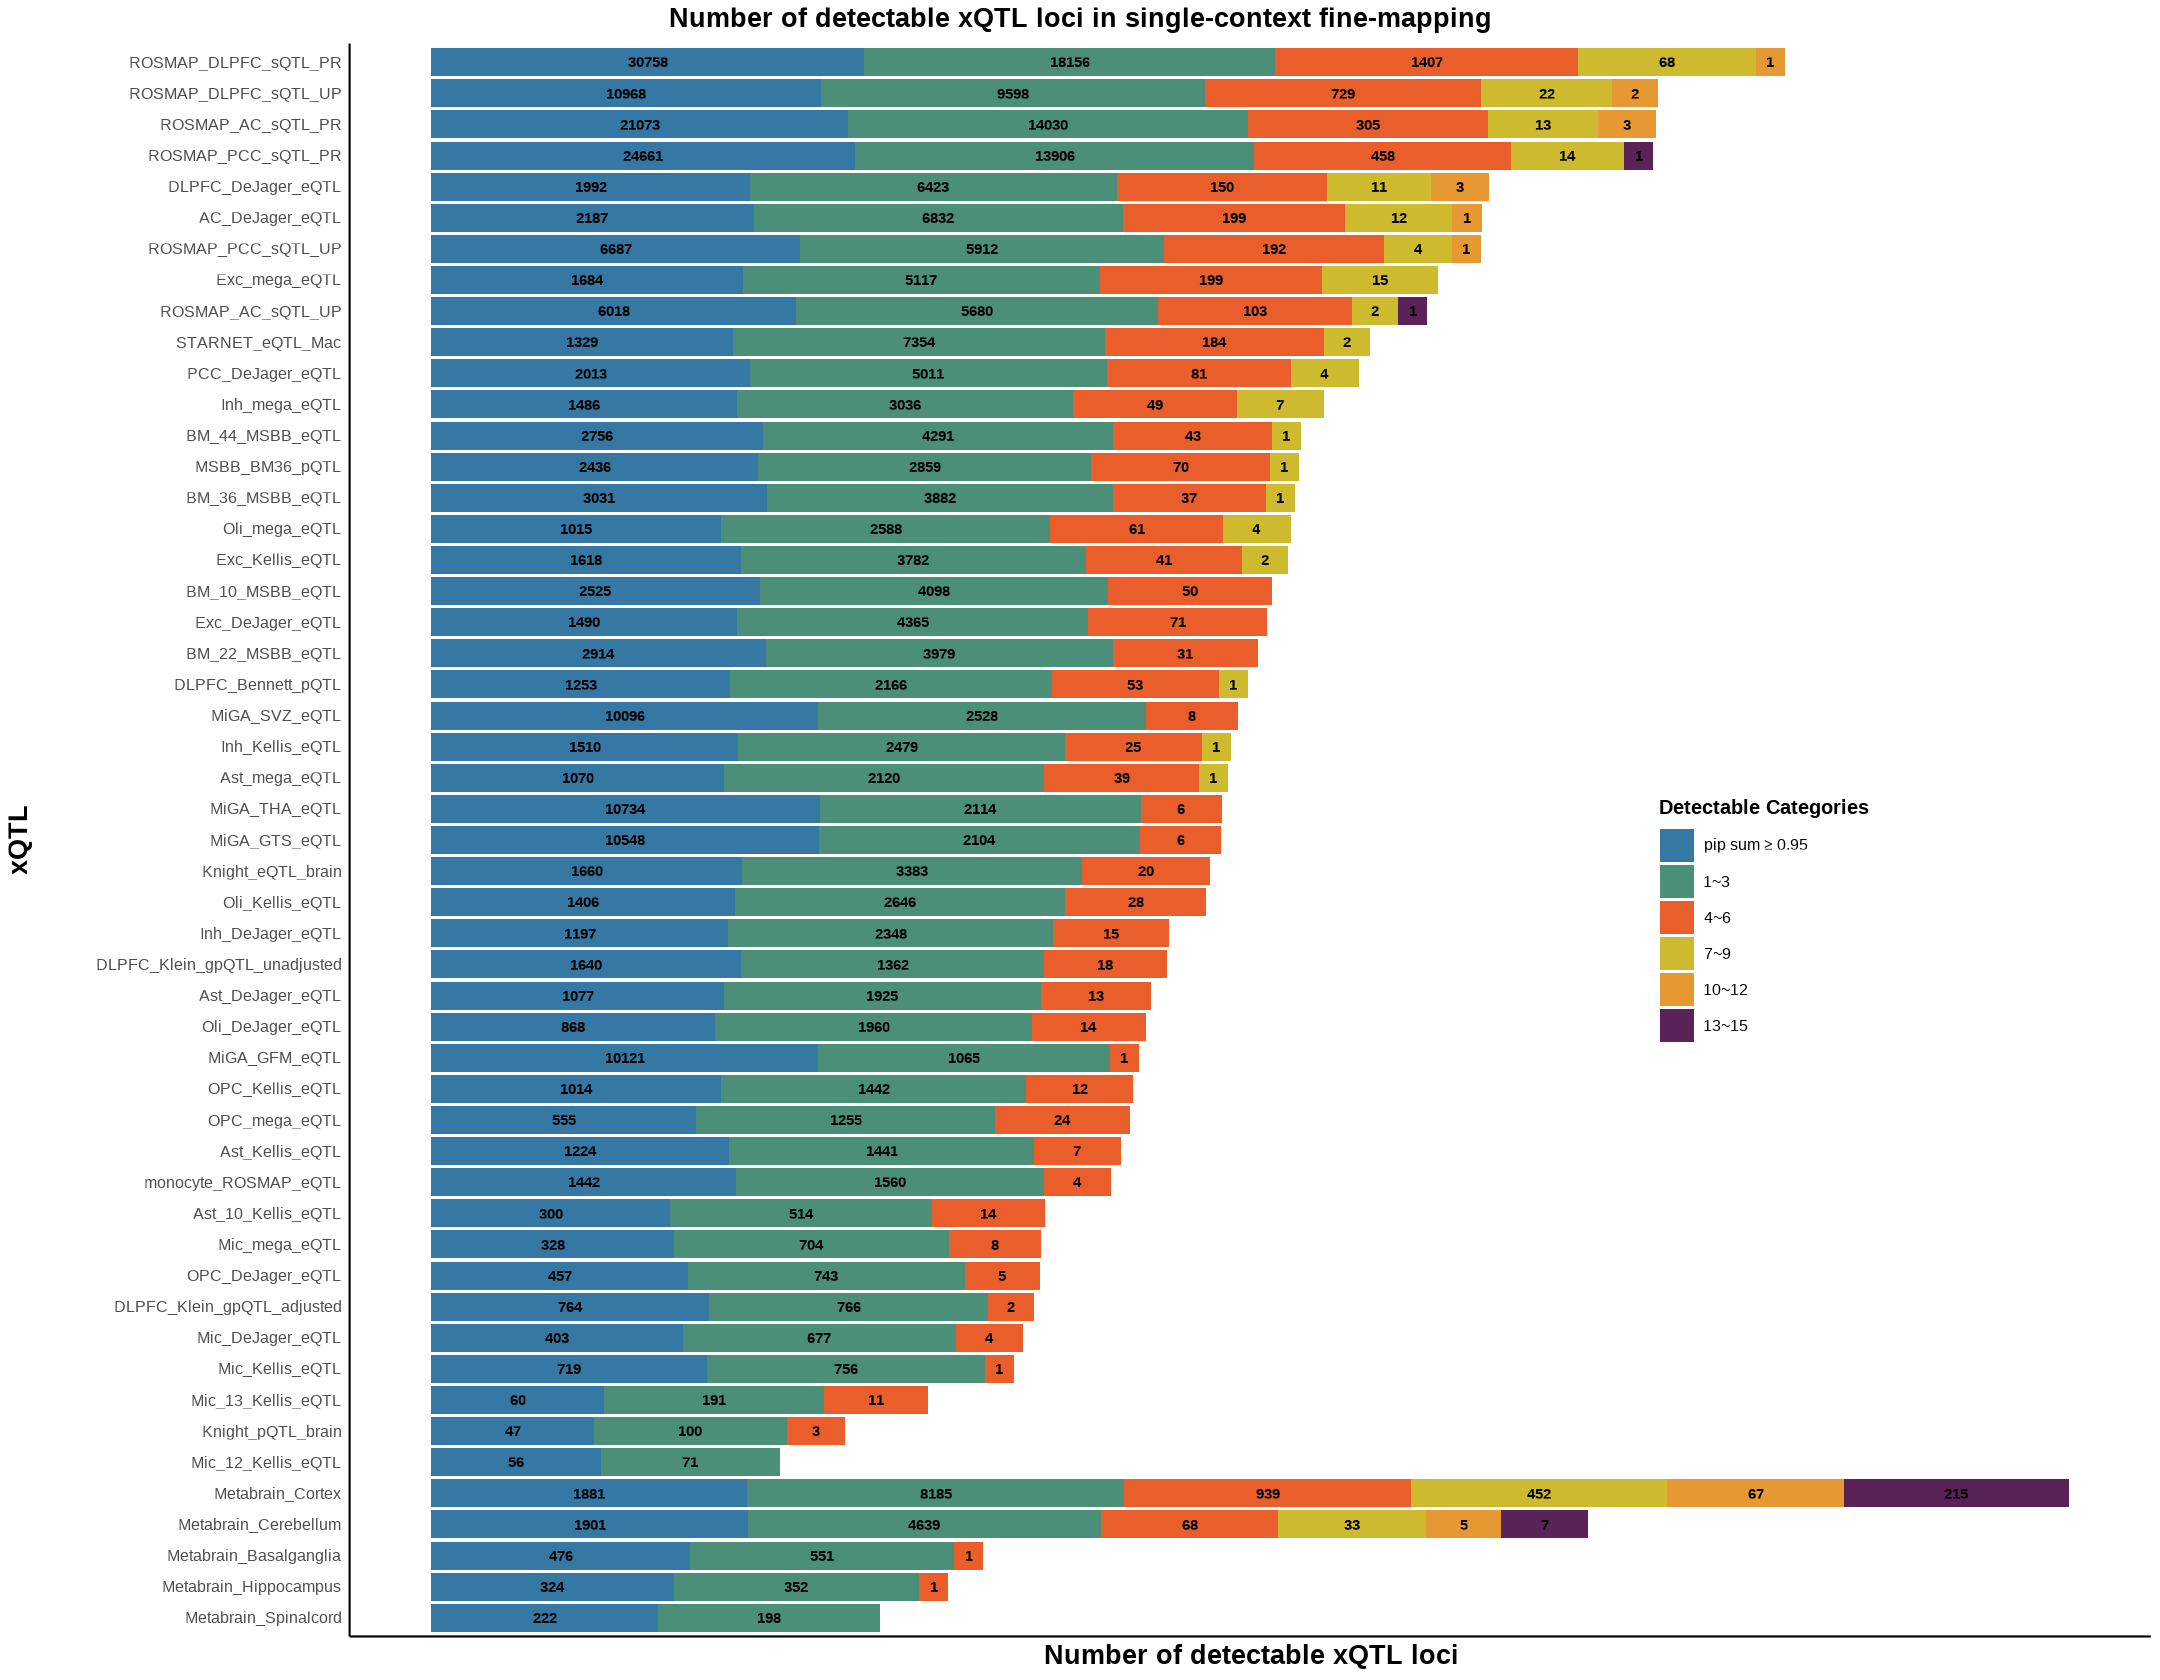

In [28]:
options(repr.plot.width = 18, repr.plot.height = 14)
p1

### Mappable xQTL loci in single-context fine-mapping

In [6]:
single_context_mappable_events_summary <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_1b/Figure_1b_ii_2.rds") #FIXME
# First: calculate total counts per resource
total_counts <- single_context_mappable_events_summary %>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_mappable_events_summary$resource <- factor(single_context_mappable_events_summary$resource, levels = rev(levels(ordered_resources)))
#pdf("single_context_stacked_plot_mappable.pdf", width =10, height = 10)
# Create stacked bar plot
p2<- ggplot(single_context_mappable_events_summary, aes(x = resource, y = log_gene_count, fill = n_mappable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
 geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of mappable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of mappable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

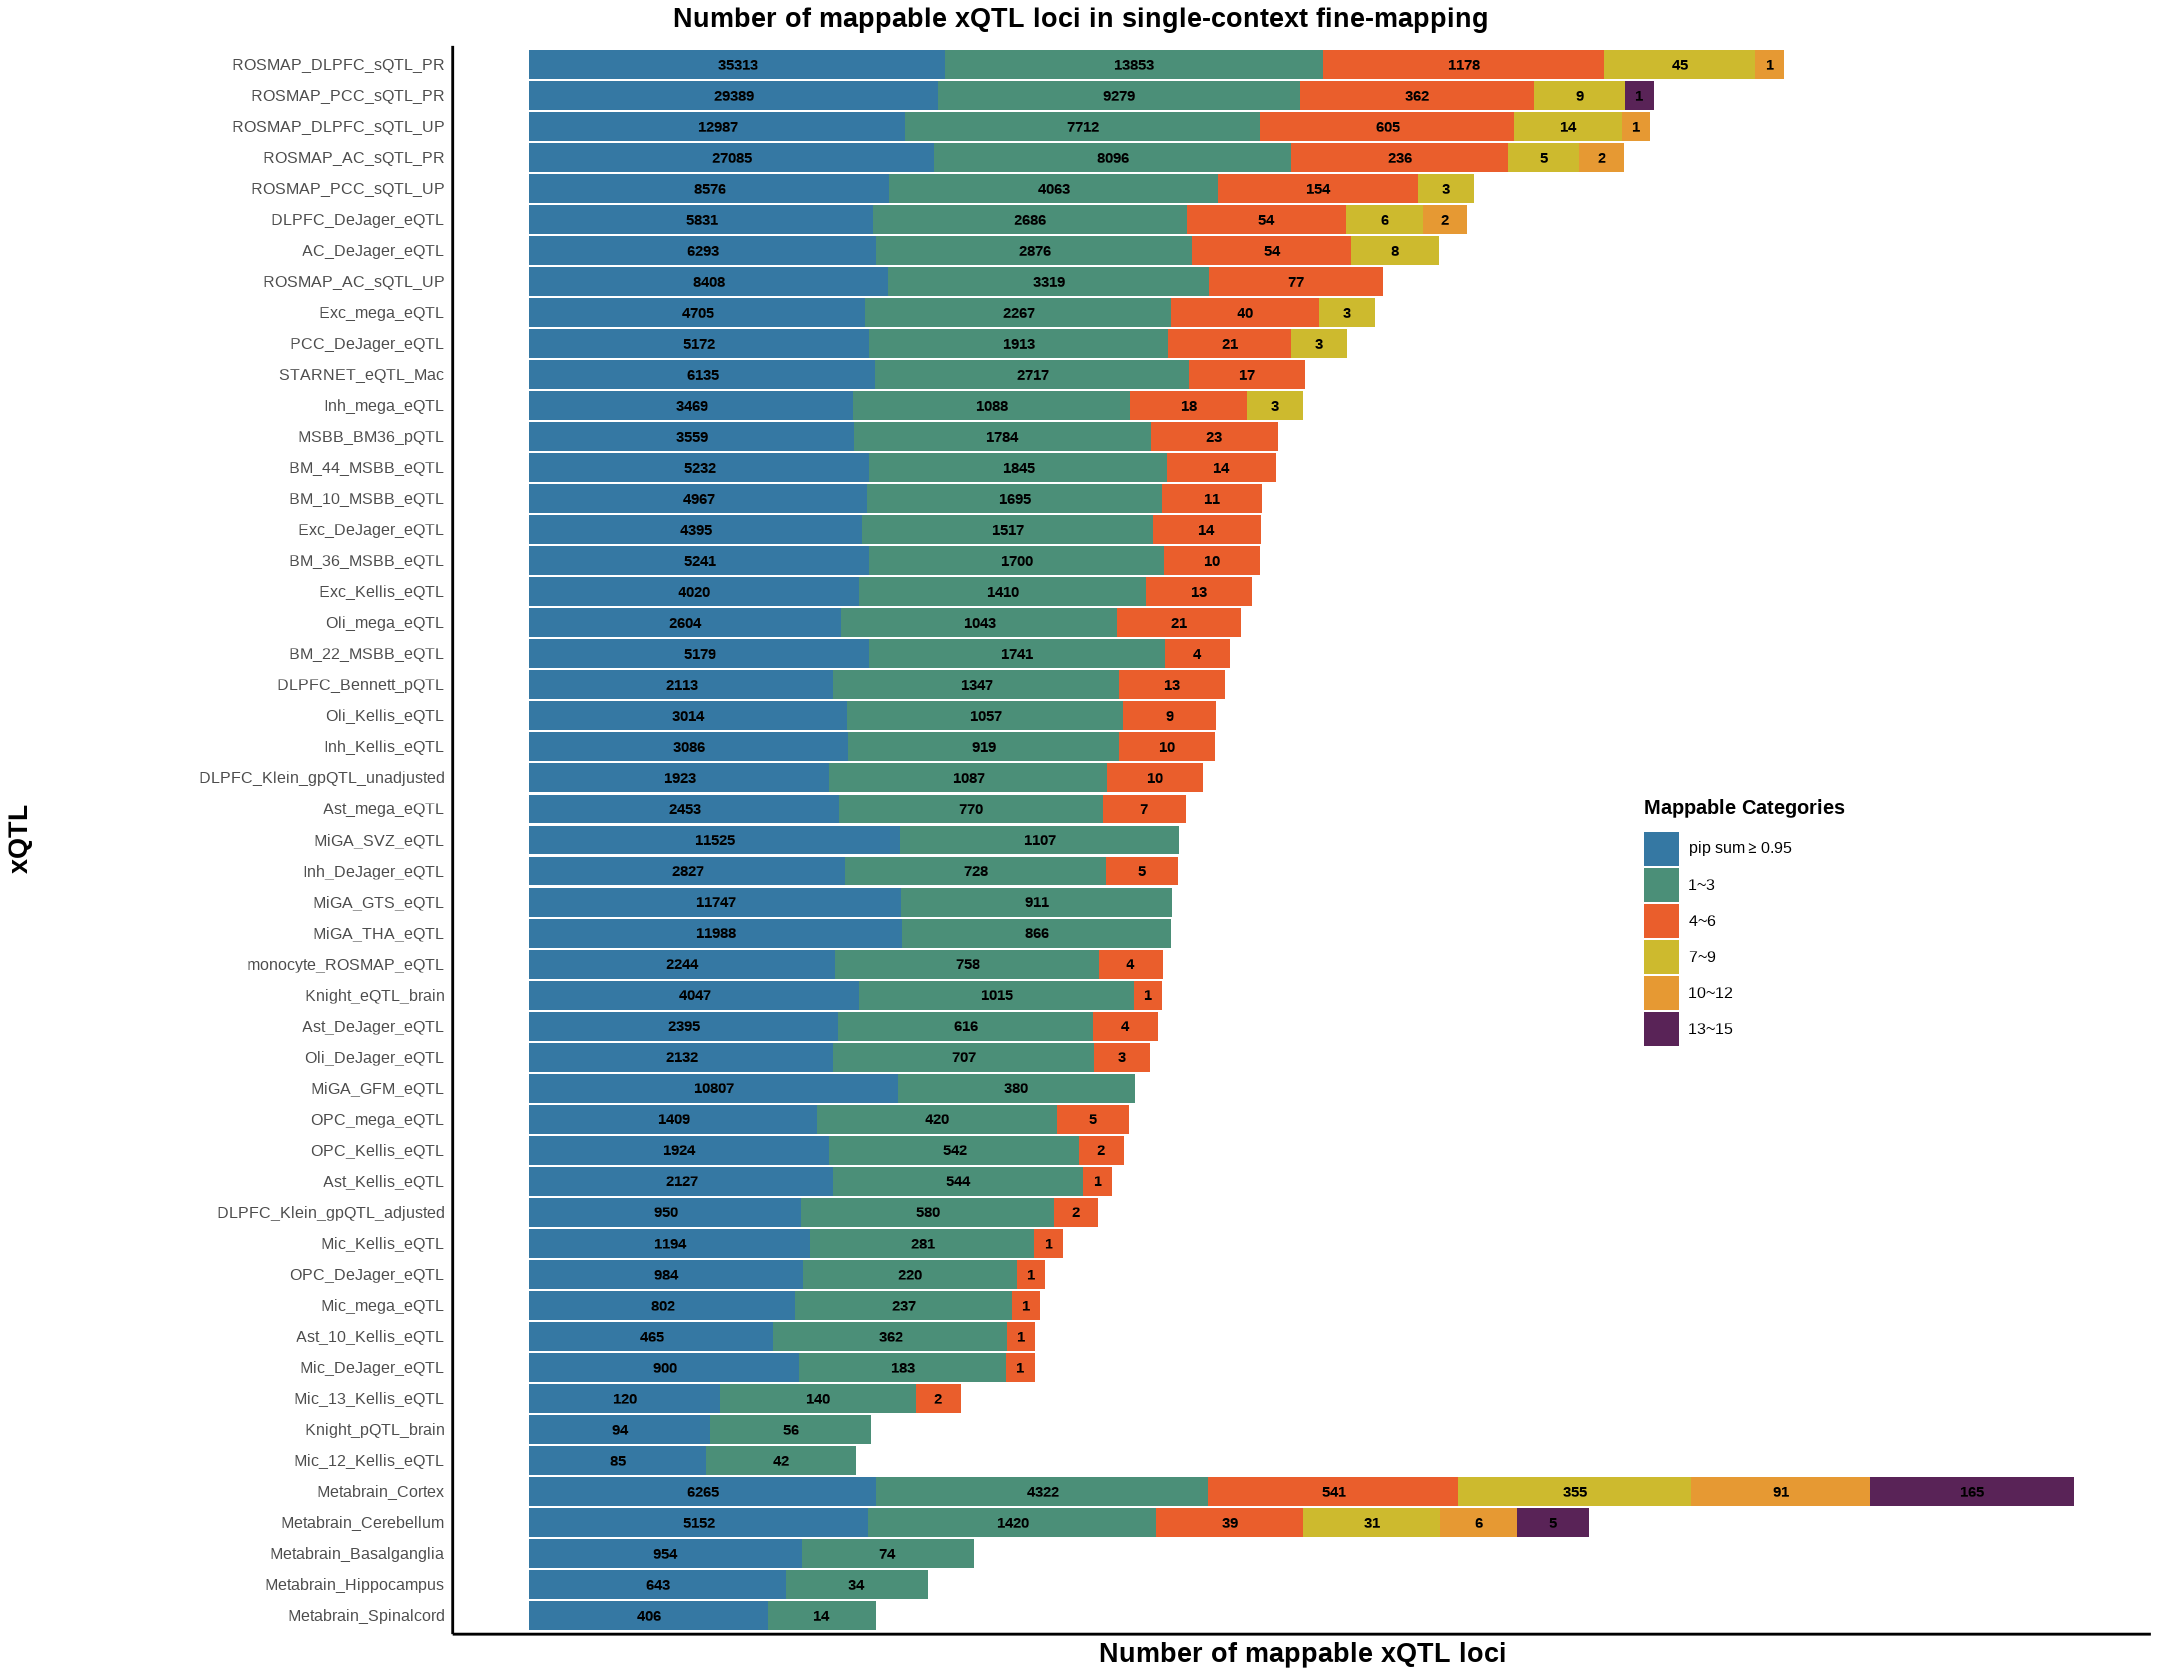

In [7]:
options(repr.plot.width = 18, repr.plot.height = 14)
p2

## Hillary's version

In [5]:
# Load data and renamed metadata
Figure_1b <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/manuscript/xQTL_flagship_2025/Figure_1b_num_xQTL_loci_single_context.rds")
contexts_metadata <- read.csv("/restricted/projectnb/xqtl/jaempawi/xqtl/contexts_metadata_colors.csv", stringsAsFactors = FALSE)


# Preserve the original factor level order
original_order <- levels(Figure_1b$detectable$resource)
Figure_1b$detectable$resource <- as.character(Figure_1b$detectable$resource)

# Create mapping function to match data with metadata
apply_metadata_mapping <- function(resource_names, contexts_metadata) {
  result <- character(length(resource_names))
  
  for(i in seq_along(resource_names)) {
    name <- resource_names[i]
    
    cell_types <- c("OPC", "Mic", "Inh", "Ast", "Oli", "Exc")
    contains_cell <- any(sapply(cell_types, function(cell) grepl(cell, name)))
    
    if(contains_cell) {
      metadata_key <- name
      metadata_key <- gsub("Kellis", "MIT", metadata_key)      
      metadata_key <- gsub("DeJager", "CUIMC1", metadata_key)  
      
      match_row <- contexts_metadata[contexts_metadata$context == metadata_key, ]
      
        if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    } else {
      match_row <- contexts_metadata[contexts_metadata$context == name, ]
      
      if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    }
  }
  
  return(result)
}

### Detectable

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_text()`).”


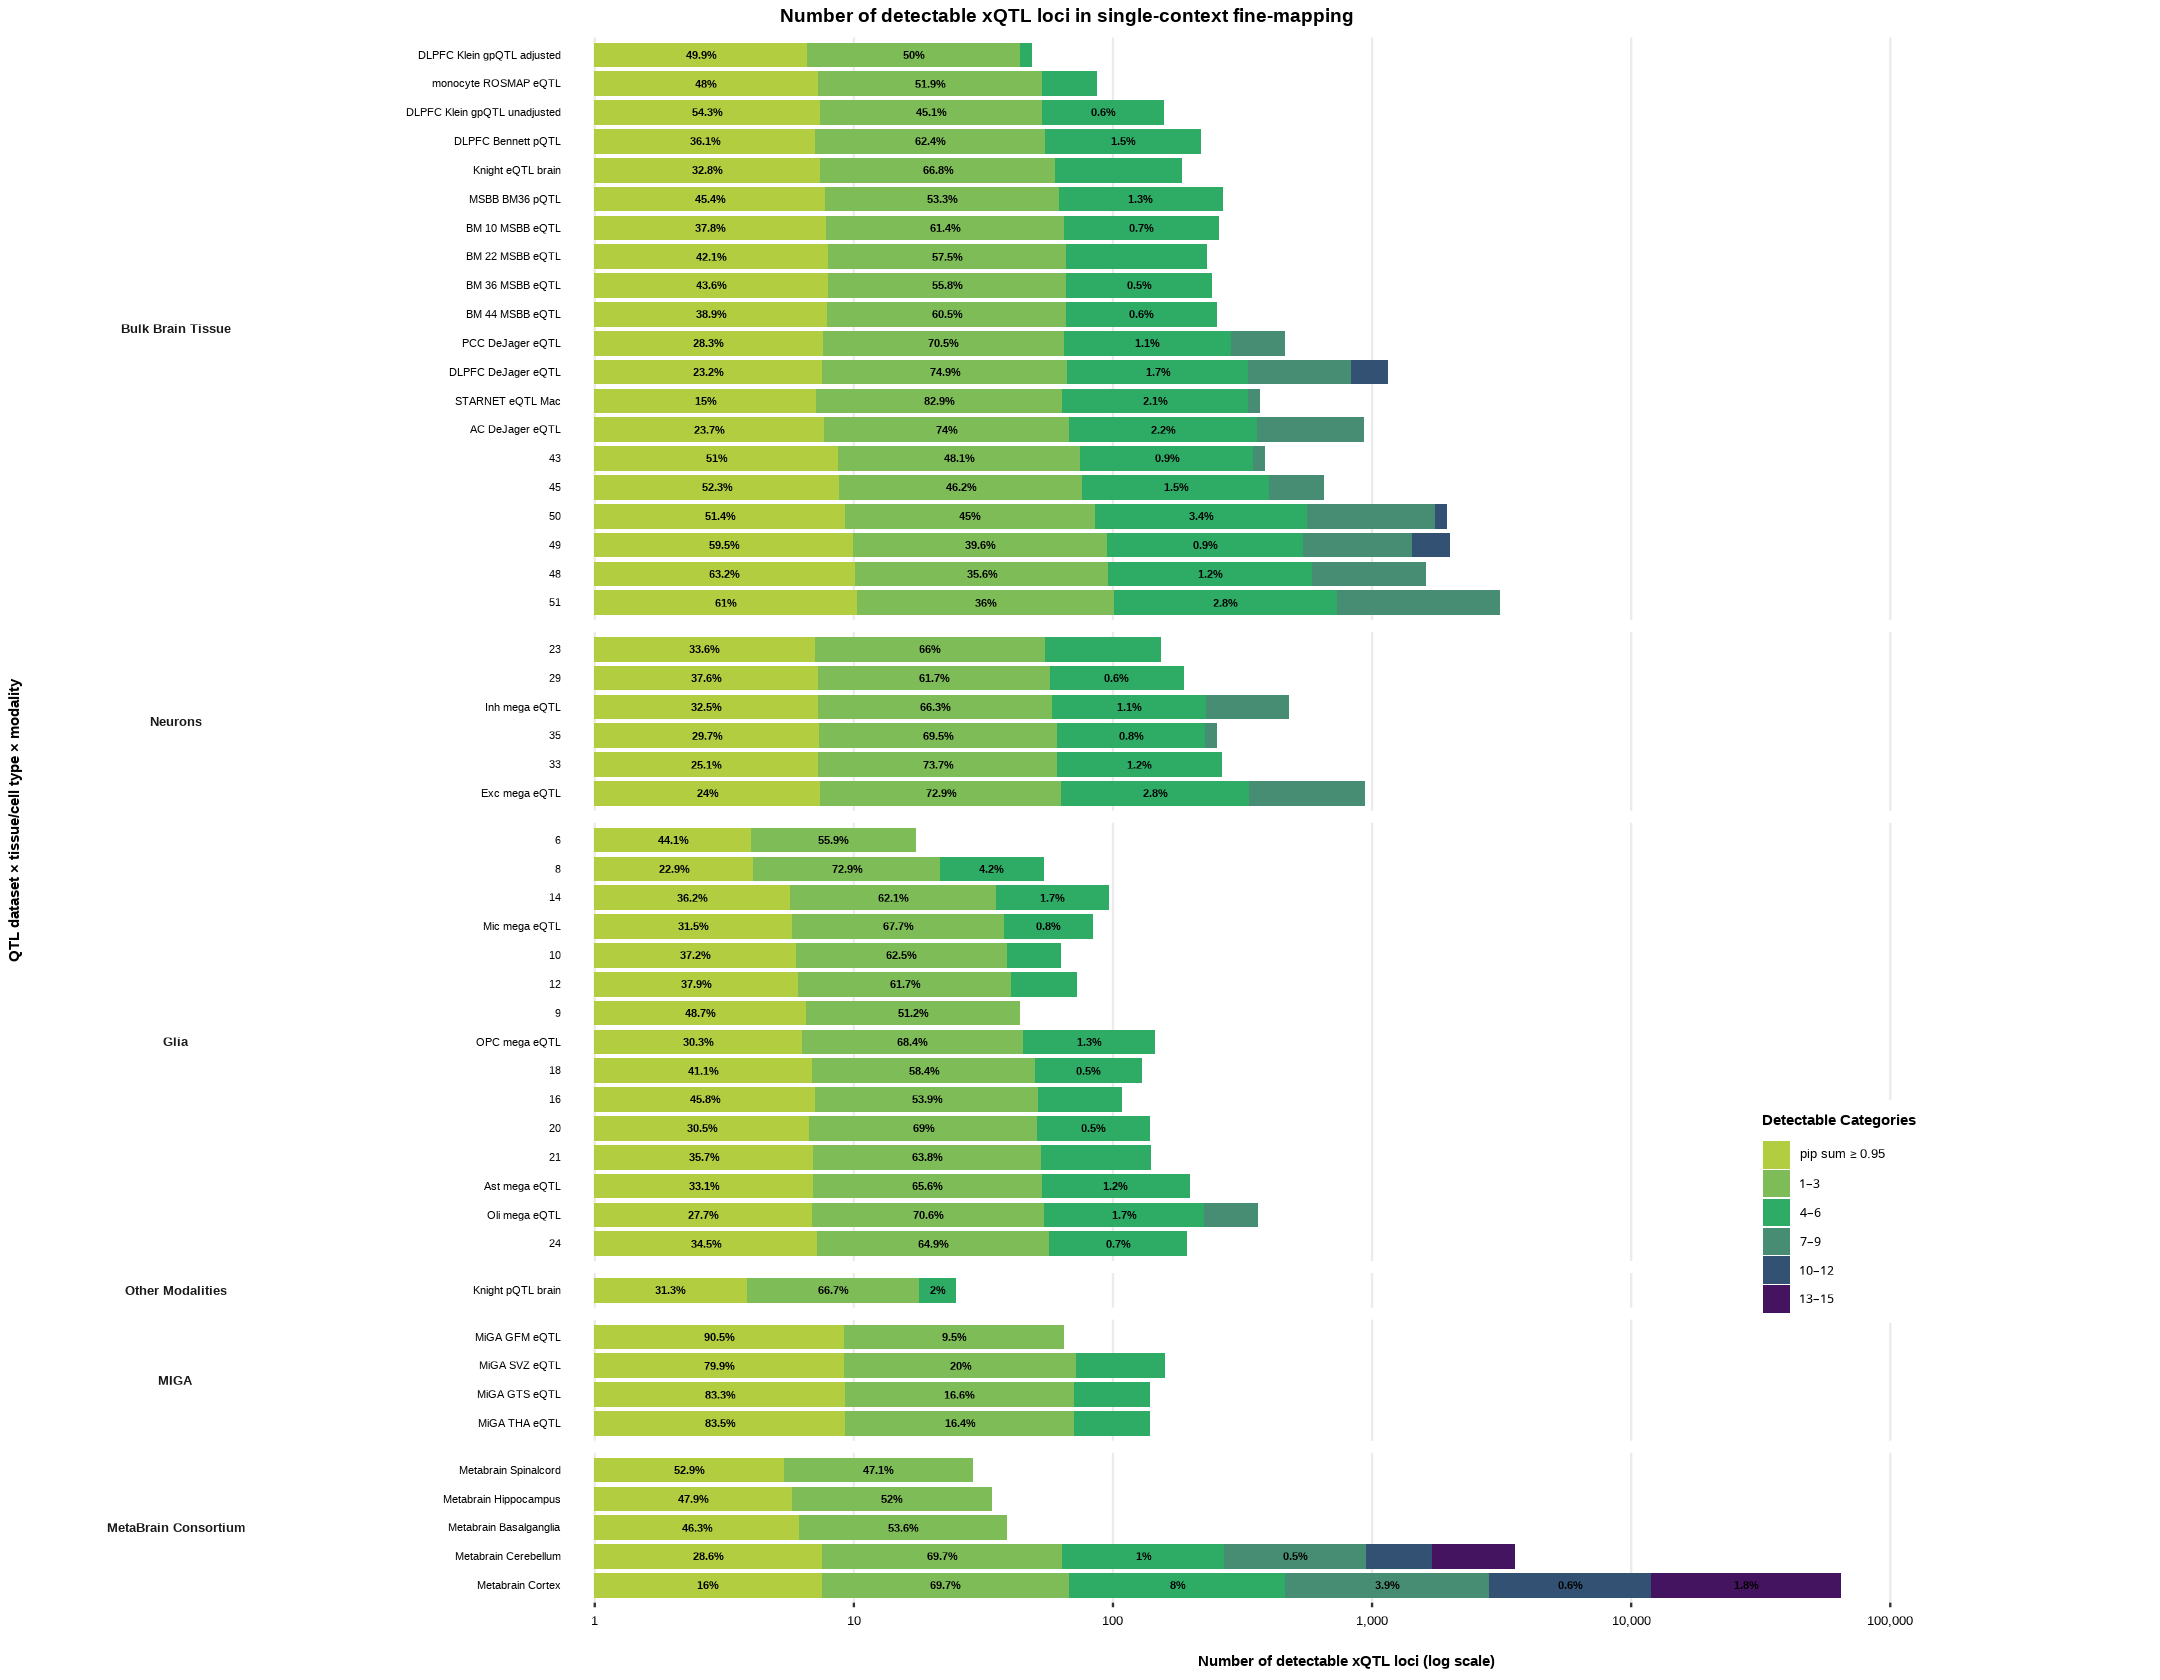

In [12]:
# Prepare detectable data
detectable_data <- Figure_1b$data$detectable

# Apply mapping to the detectable data
detectable_data$mapped_resource <- apply_metadata_mapping(
  detectable_data$resource, 
  contexts_metadata
)

# Replace underscores with spaces for display
detectable_data$mapped_resource <- gsub("_", " ", detectable_data$mapped_resource)

# Calculate percentages and prepare total counts
detectable_data <- detectable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),  # Sum actual counts for display
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()

# Add tissue grouping for faceting
detectable_data <- detectable_data %>%
  mutate(
    tissue_group = case_when(
      grepl("STARNET|ROSMAP|PCC|DLPFC|MSBB|Knight.*eQTL.*brain|AC.*DeJager|BM.*MSBB|PCC.*DeJager", resource) ~ "Bulk Brain Tissue",
      grepl("Inh|Exc", resource) ~ "Neurons",
      grepl("Knight.*pQTL|DLPFC.*Klein", resource) ~ "Other Modalities",
      grepl("MIGA|MiGA", resource) ~ "MIGA",
      grepl("Metabrain", resource) ~ "MetaBrain Consortium",
      TRUE ~ "Glia"
    )
  )

# Create ordering within each tissue group (descending by total count)
detectable_data <- detectable_data %>%
  group_by(tissue_group) %>%
  arrange(desc(total_count), .by_group = TRUE) %>%
  mutate(rank_in_group = row_number()) %>%
  ungroup()

# Define color palette
color_palette_new <- c("#451460","#335172","#478d73","#2eac66", "#7ebc57", "#b3cd41")

# Set plot options and theme
options(repr.plot.width = 18, repr.plot.height = 14)

# Define the order of tissue groups for faceting
tissue_group_order <- c("Bulk Brain Tissue", "Neurons", "Glia", "Other Modalities", 
                        "MIGA", "MetaBrain Consortium")

detectable_data$tissue_group <- factor(detectable_data$tissue_group, levels = tissue_group_order)

# Create the detectable plot
p1 <- ggplot(detectable_data,
             aes(x = pmax(log_gene_count, 0.001),  # Avoid log issues
                 y = reorder(mapped_resource, rank_in_group),
                 fill = n_detectable_category)) +
  
  geom_bar(stat = "identity", position = "stack", width = 0.82) +
  
  # Add percentage labels on bars (only show if >= 0.5%)
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, 
                               paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3, fontface = "bold", lineheight = 0.9) +
  
  # Color scale for detectable categories
  scale_fill_manual(values = color_palette_new, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), 
                                   "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  
  # Facet by tissue group with free y-axis scales
  facet_grid(tissue_group ~ ., scales = "free_y", space = "free_y", switch = "y") +
  
  # Axis labels and title
  labs(
    title = "Number of detectable xQTL loci in single-context fine-mapping",
    x = "Number of detectable xQTL loci (log scale)",   
    y = "QTL dataset × tissue/cell type × modality"
  ) +
  
  # X-axis scale with better spacing and more breaks
  scale_x_continuous(
    trans = "log10",
    breaks = 10^(0:5),
    labels = c("1","10","100","1,000","10,000","100,000"),
    expand = expansion(mult = c(0.02, 0.18)),
    limits = c(1, 1e5)
  ) +
  
  theme_bw(base_size = 11) +
  theme(
    strip.placement = "outside",
    strip.background = element_blank(),
    strip.text.y.left = element_text(angle = 0, face = "bold", size = 10),
    
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    plot.title.position = "plot",
    
    axis.text.x = element_text(size = 10, color = "black", angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 8, color = "black"),
    axis.title.x = element_text(size = 11, face = "bold", margin = margin(t = 15)),
    axis.title.y = element_text(size = 11, face = "bold", margin = margin(r = 15)),
    axis.ticks.y = element_blank(),
    
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    
    panel.border = element_blank(),
    panel.spacing = unit(0.5, "lines"),
    
    legend.text = element_text(size = 10, face = "bold"),
    legend.title = element_text(size = 11, face = "bold"),
    legend.position = c(0.85, 0.25),
    legend.key.size = unit(1.2, "lines"),
    
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    plot.margin = margin(5.5, 22, 5.5, 5.5)
  ) +
  
  coord_cartesian(clip = "off")

print(p1)


### Mappable

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_text()`).”


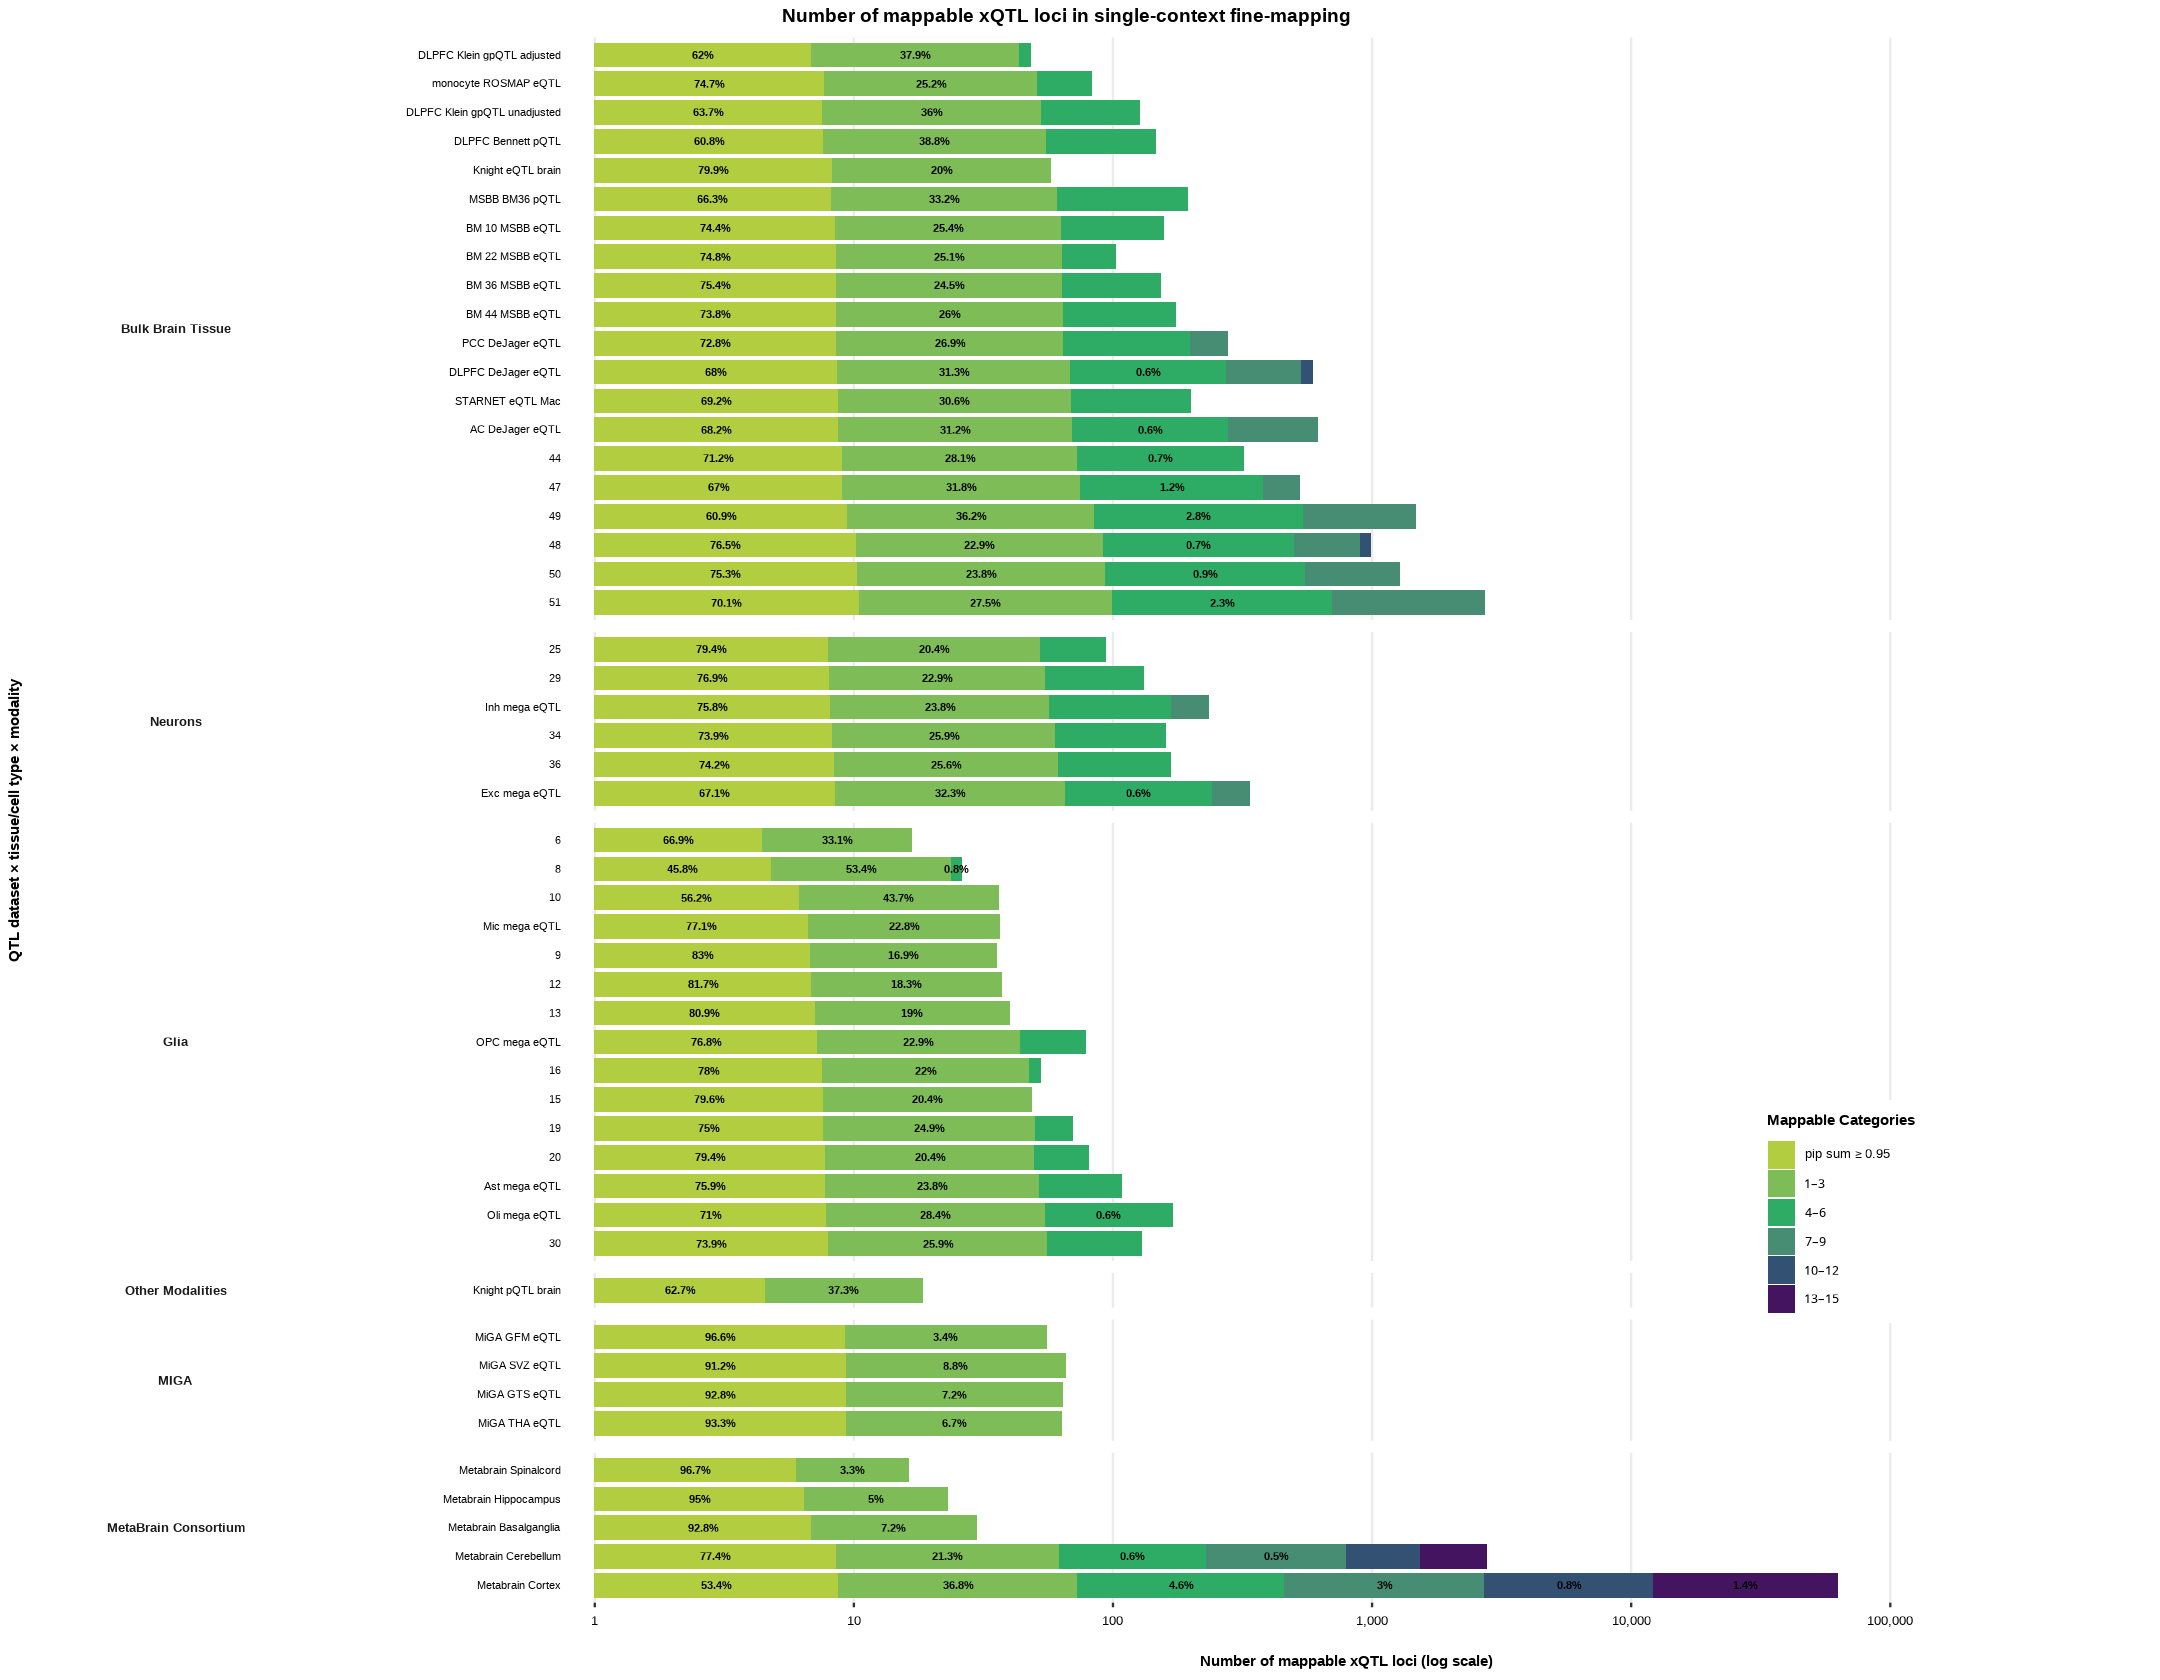

In [6]:
# Prepare mappable data
mappable_data <- Figure_1b$data$mappable

# Apply mapping to the mappable data
mappable_data$mapped_resource <- apply_metadata_mapping(
  mappable_data$resource, 
  contexts_metadata
)

# Replace underscores with spaces for display
mappable_data$mapped_resource <- gsub("_", " ", mappable_data$mapped_resource)

# Calculate percentages and prepare total counts
mappable_data <- mappable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),  # Sum actual counts for display
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()

# Add tissue grouping for faceting
mappable_data <- mappable_data %>%
  mutate(
    tissue_group = case_when(
      grepl("STARNET|ROSMAP|PCC|DLPFC|MSBB|Knight.*eQTL.*brain|AC.*DeJager|BM.*MSBB|PCC.*DeJager", resource) ~ "Bulk Brain Tissue",
      grepl("Inh|Exc", resource) ~ "Neurons",
      grepl("Knight.*pQTL|DLPFC.*Klein", resource) ~ "Other Modalities",
      grepl("MIGA|MiGA", resource) ~ "MIGA",
      grepl("Metabrain", resource) ~ "MetaBrain Consortium",
      TRUE ~ "Glia"
    )
  )

# Create ordering within each tissue group (descending by total count)
mappable_data <- mappable_data %>%
  group_by(tissue_group) %>%
  arrange(desc(total_count), .by_group = TRUE) %>%
  mutate(rank_in_group = row_number()) %>%
  ungroup()

# Apply tissue group ordering
mappable_data$tissue_group <- factor(mappable_data$tissue_group, levels = tissue_group_order)

# Create the mappable plot
p2 <- ggplot(mappable_data,
             aes(x = pmax(log_gene_count, 0.001),  # Avoid log issues
                 y = reorder(mapped_resource, rank_in_group),
                 fill = n_mappable_category)) +
  
  geom_bar(stat = "identity", position = "stack", width = 0.82) +
  
  # Add percentage labels on bars (only show if >= 0.5%)
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, 
                               paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3, fontface = "bold", lineheight = 0.9) +
  
  # Color scale for mappable categories
  scale_fill_manual(values = color_palette_new, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), 
                                   "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  
  # Facet by tissue group with free y-axis scales
  facet_grid(tissue_group ~ ., scales = "free_y", space = "free_y", switch = "y") +
  
  # Axis labels and title
  labs(
    title = "Number of mappable xQTL loci in single-context fine-mapping",
    x = "Number of mappable xQTL loci (log scale)",   
    y = "QTL dataset × tissue/cell type × modality"
  ) +
  
  # X-axis scale with better spacing and more breaks
  scale_x_continuous(
    trans = "log10",
    breaks = 10^(0:5),
    labels = c("1","10","100","1,000","10,000","100,000"),
    expand = expansion(mult = c(0.02, 0.18)),
    limits = c(1, 1e5)
  ) +
  
  theme_bw(base_size = 11) +
  theme(
    strip.placement = "outside",
    strip.background = element_blank(),
    strip.text.y.left = element_text(angle = 0, face = "bold", size = 10),
    
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    plot.title.position = "plot",
    
    axis.text.x = element_text(size = 10, color = "black", angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 8, color = "black"),
    axis.title.x = element_text(size = 11, face = "bold", margin = margin(t = 15)),
    axis.title.y = element_text(size = 11, face = "bold", margin = margin(r = 15)),
    axis.ticks.y = element_blank(),
    
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    
    panel.border = element_blank(),
    panel.spacing = unit(0.5, "lines"),
    
    legend.text = element_text(size = 10, face = "bold"),
    legend.title = element_text(size = 11, face = "bold"),
    legend.position = c(0.85, 0.25),
    legend.key.size = unit(1.2, "lines"),
    
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    plot.margin = margin(5.5, 22, 5.5, 5.5)
  ) +
  
  coord_cartesian(clip = "off")

print(p2)


## Polish Version

#### Detectable

In [84]:
# Load data and renamed metadata
Figure_1b <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/manuscript/xQTL_flagship_2025/Figure_1b_num_xQTL_loci_single_context.rds")
# Prepare detectable data - REVERTED to match mappable style
detectable_data <- Figure_1b$data$detectable

In [85]:
# Prepare detectable data
detectable_data <- Figure_1b$data$detectable

# Simplify: just use original resource names with spaces for display
detectable_data$display_resource <- gsub("_", " ", detectable_data$resource)

# Calculate percentages and prepare total counts WITH PROPER AGGREGATION
detectable_data <- detectable_data %>%
  mutate(n_detectable_category = as.numeric(as.character(n_detectable_category))) %>%
  mutate(
    n_detectable_category = case_when(
      n_detectable_category == 1 ~ "pip sum ≥ 0.95",
      n_detectable_category == 2 ~ "1–3",
      n_detectable_category == 3 ~ "4-6",
      n_detectable_category == 4 ~ "7–9",
      n_detectable_category >= 5 ~ "≥10",
      TRUE ~ as.character(n_detectable_category)
    )
  ) %>%
  group_by(resource, display_resource, n_detectable_category) %>%
  summarize(
    gene_count = sum(gene_count),
    .groups = "drop"
  ) %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),
    percentage = round((gene_count / total_count) * 100, 1),
    log_gene_count = log10(gene_count)
  ) %>%
  ungroup()

# Set factor levels for LEFT-TO-RIGHT stacking
detectable_data <- detectable_data %>%
  mutate(n_detectable_category = factor(
    n_detectable_category,
    levels = c("≥10", "7–9", "4-6", "1–3", "pip sum ≥ 0.95")
  ))

# Add tissue grouping for faceting
detectable_data <- detectable_data %>%
  mutate(
    tissue_group = case_when(
      grepl("STARNET|ROSMAP|PCC|DLPFC|MSBB|Knight.*eQTL.*brain|AC.*DeJager|BM.*MSBB|PCC.*DeJager", resource) ~ "Bulk Brain Tissue",
      grepl("Inh|Exc", resource) ~ "Neurons",
      grepl("Knight.*pQTL|DLPFC.*Klein", resource) ~ "Other",
      grepl("MIGA|MiGA", resource) ~ "MiGA",
      grepl("Metabrain", resource) ~ "MetaBrain\nConsortium",
      TRUE ~ "Glia"
    )
  )

# Create ordering within each tissue group
detectable_data <- detectable_data %>%
  group_by(tissue_group) %>%
  arrange(desc(total_count), .by_group = TRUE) %>%
  mutate(rank_in_group = row_number()) %>%
  ungroup()

# Define the order of tissue groups for faceting
tissue_group_order <- c("Bulk Brain Tissue", "Neurons", "Glia", "Other",
                        "MiGA", "MetaBrain\nConsortium")

detectable_data$tissue_group <- factor(detectable_data$tissue_group, levels = tissue_group_order)

# Calculate bar end positions in LOG space
bar_end_positions <- detectable_data %>%
  group_by(resource) %>%
  summarise(
    display_resource = first(display_resource),
    tissue_group = first(tissue_group),
    rank_in_group = first(rank_in_group),
    total_count = first(total_count),
    x_end = sum(log_gene_count),
    .groups = "drop"
  )

# Identify small segments (less than 5% or narrow in log space)
detectable_data <- detectable_data %>%
  mutate(
    is_small = percentage < 5 | log_gene_count < 0.15,  # Adjust threshold as needed
    label_inside = ifelse(is_small, "", paste0(percentage, "%")),
    label_outside = ifelse(is_small, paste0(percentage, "%"), "")
  )

# Calculate position for outside labels (at the middle of each segment in log space)
detectable_data <- detectable_data %>%
  group_by(resource) %>%
  arrange(desc(n_detectable_category)) %>%
  mutate(
    cumsum_log = cumsum(log_gene_count),
    x_middle = cumsum_log - log_gene_count/2
  ) %>%
  ungroup()

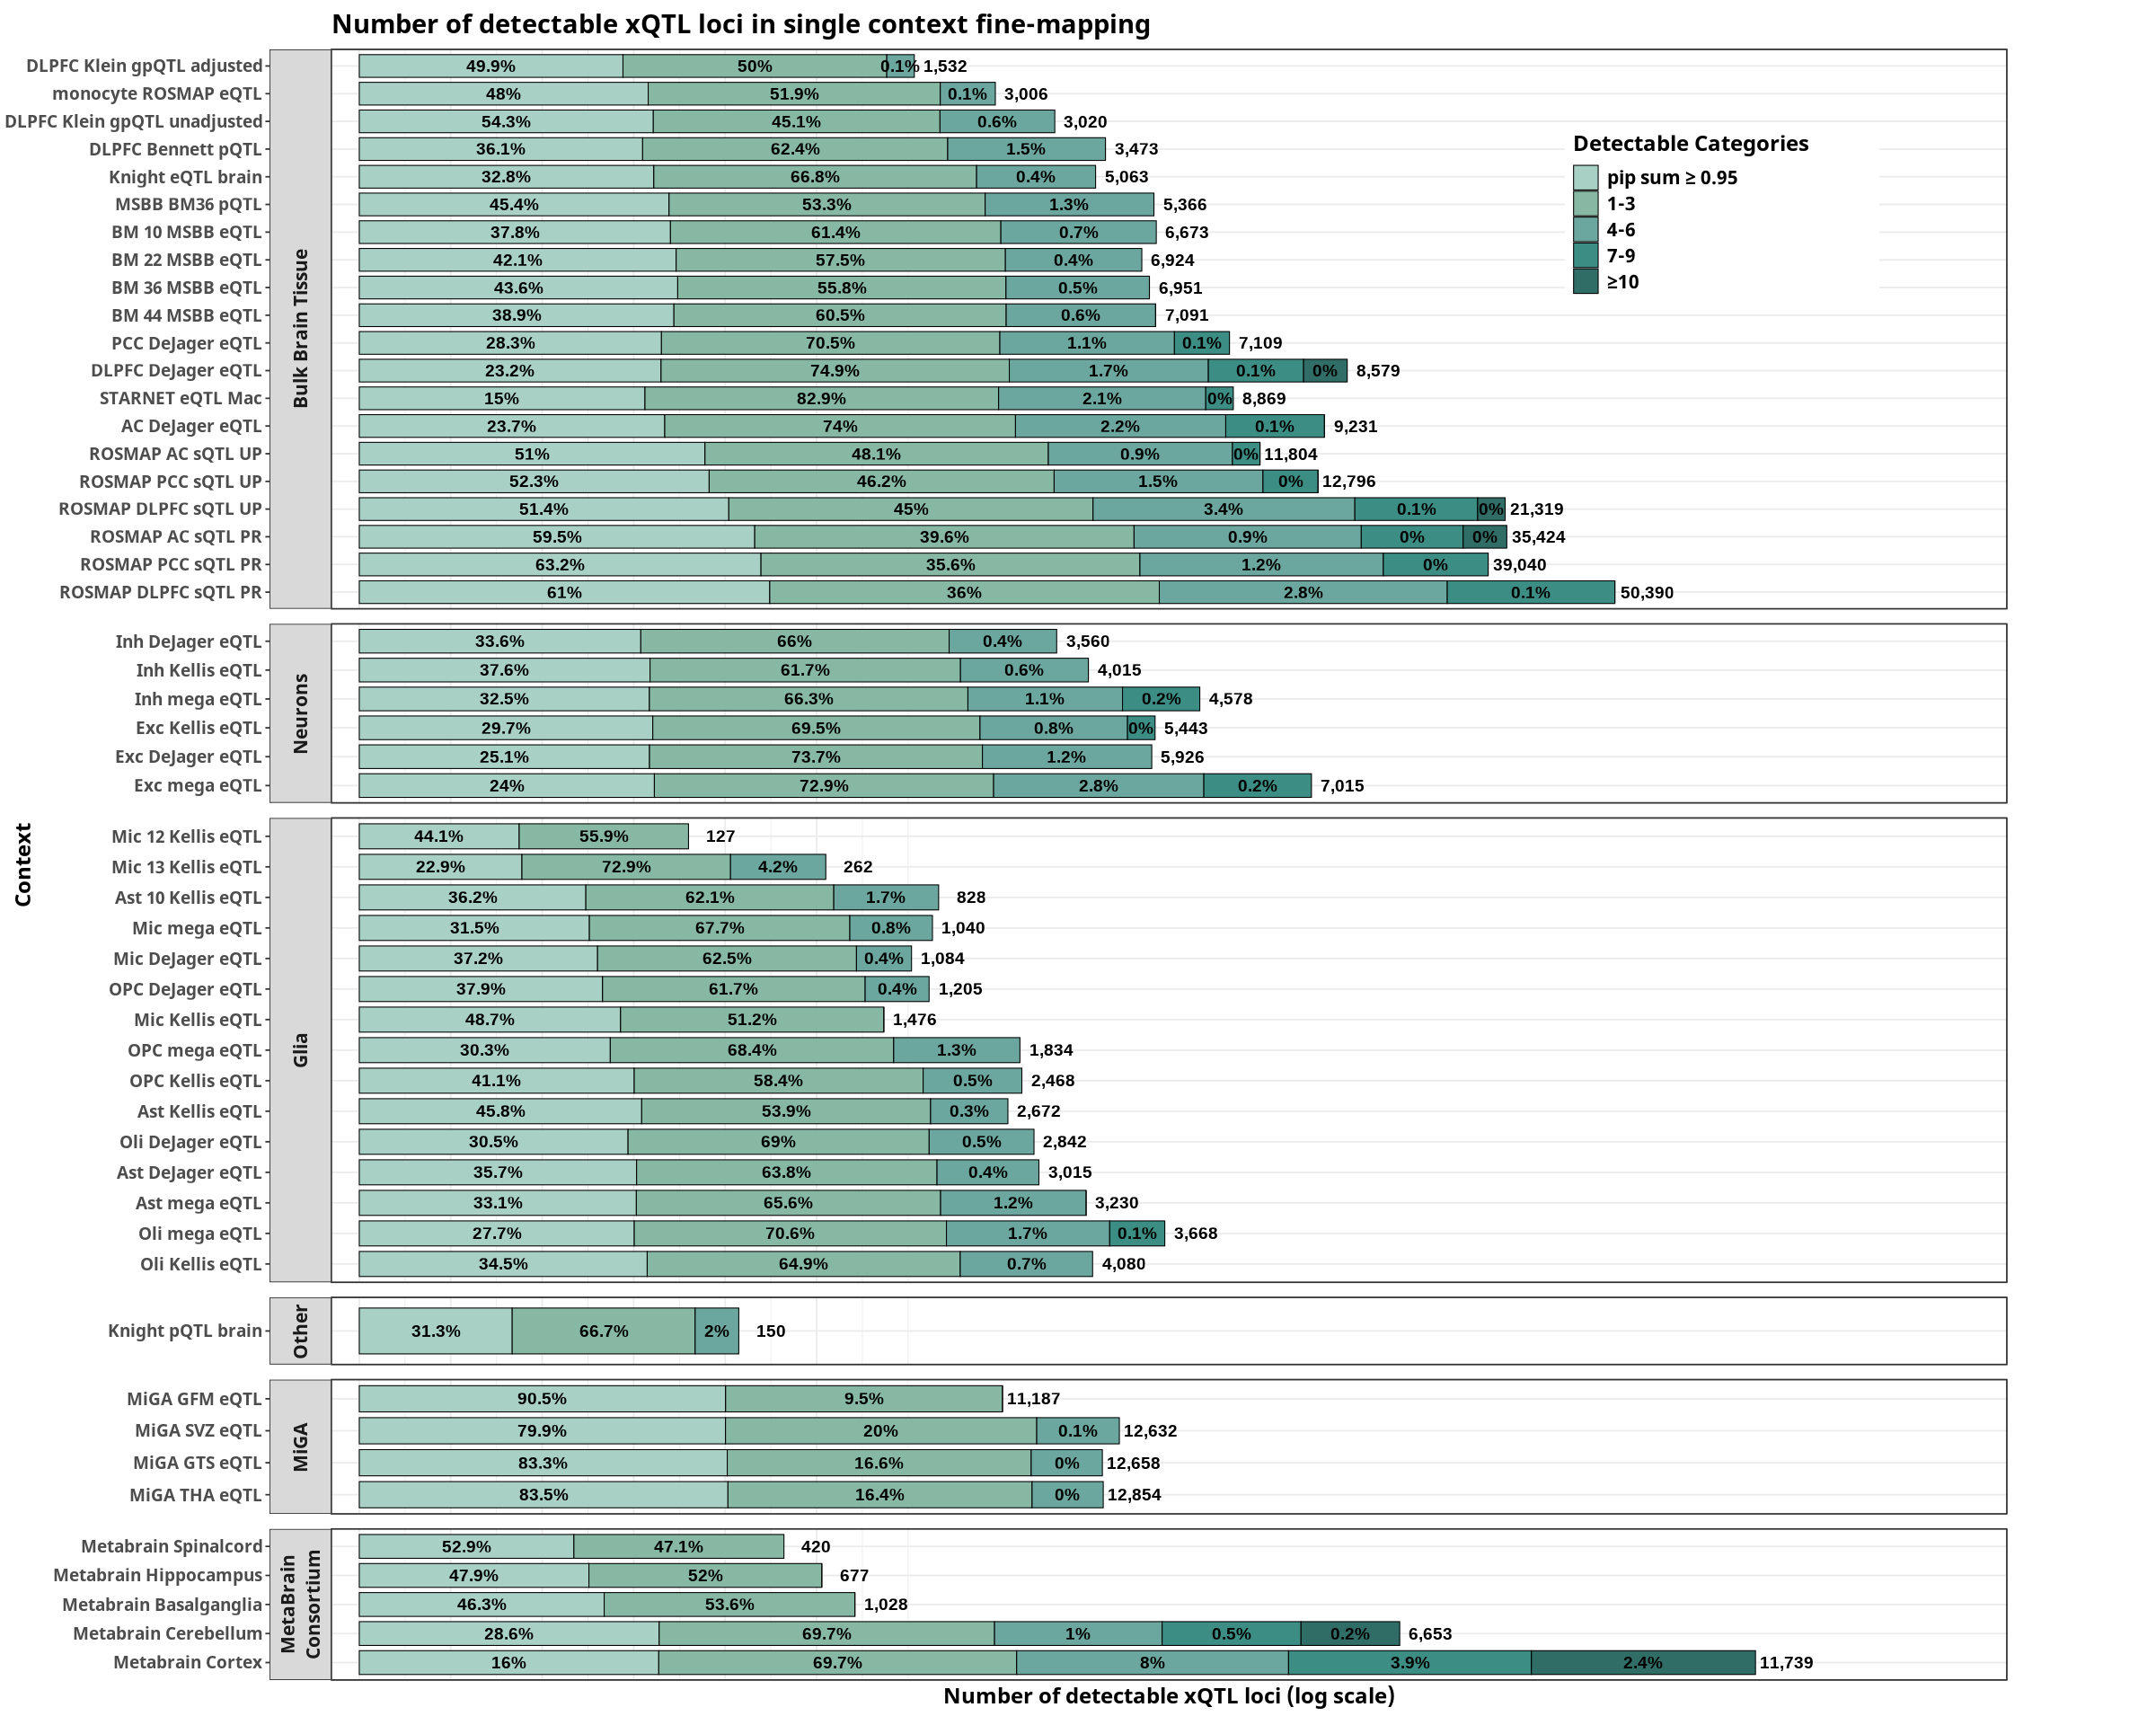

In [86]:
options(repr.plot.width = 20, repr.plot.height = 16)

# Create the plot
p1 <- ggplot(detectable_data,
             aes(x = log_gene_count,
                 y = reorder(display_resource, rank_in_group),
                 fill = n_detectable_category)) +

  geom_bar(stat = "identity", position = "stack", width = 0.82, color = "black", size = 0.3) +
  
  # Only label segments that are large enough in log space
    geom_text(aes(label = ifelse(gene_count > 0 & log_gene_count > 0.01, paste0(round(percentage, 2), "%"), "")),
          position = position_stack(vjust = 0.5),
          color = "black", size = 5, fontface = "bold", lineheight = 0.9) +
  
  geom_text(data = bar_end_positions,
            aes(x = x_end,
                y = reorder(display_resource, rank_in_group),
                label = format(total_count, big.mark = ",")),
            inherit.aes = FALSE,
            hjust = -0.1,
            size = 5,
            fontface = "bold",
            color = "black") +
  
  scale_fill_manual(
    values = rev(color_palette),
    name = "Detectable Categories", 
    labels = rev(c("pip sum ≥ 0.95", "1-3", "4-6", "7-9", "≥10")),
    guide = guide_legend(reverse = TRUE)
  ) +
  
  facet_grid(tissue_group ~ ., scales = "free_y", space = "free_y", switch = "y") +
  
  labs(
    title = "Number of detectable xQTL loci in single context fine-mapping",
    x = "Number of detectable xQTL loci (log scale)",   
    y = "Context"
  ) +
  
  scale_x_continuous(
    breaks = log10(10^(0:5)),
    labels = c("1","10","100","1,000","10,000","100,000"),
    expand = expansion(mult = c(0.02, 0.18)),
    limits = c(0, NA)
  ) +
  
  theme_bw(base_size = 11) +
  theme(
    text = element_text(family = "Noto Sans", size = 18, face = "bold"),
    legend.position = c(0.83, 0.9),
    axis.title.x = element_text(size = 18, face = "bold"),
    axis.text.x = element_blank(),   # Remove x-axis text
    axis.ticks.x = element_blank(),  # Remove x-axis ticks
    axis.title.y = element_text(size = 18, face = "bold", margin = margin(r = -70)),
    legend.title = element_text(size = 18, face = "bold"),  
    legend.text = element_text(size = 16, face = "bold"),  
    strip.text.y = element_text(size = 16, face = "bold"),
    panel.spacing.y = unit(0.7, "lines"),
    plot.margin = margin(t = 10, r = 100, b = 10, l = 10)
  ) +
  
  coord_cartesian(clip = "off")

p1 <- p1 + force_panelsizes(rows = c(5, 1.6, 4.15, 0.6, 1.2, 1.35))

print(p1)

#### Mappable

In [87]:
# Prepare mappable data
mappable_data <- Figure_1b$data$mappable

# Simplify: just use original resource names with spaces for display
mappable_data$display_resource <- gsub("_", " ", mappable_data$resource)

# Calculate percentages and prepare total counts WITH PROPER AGGREGATION
mappable_data <- mappable_data %>%
  mutate(n_mappable_category = as.numeric(as.character(n_mappable_category))) %>%
  mutate(
    n_mappable_category = case_when(
      n_mappable_category == 1 ~ "pip sum ≥ 0.95",
      n_mappable_category == 2 ~ "1–3",
      n_mappable_category == 3 ~ "4-6",
      n_mappable_category == 4 ~ "7–9",
      n_mappable_category >= 5 ~ "≥10",
      TRUE ~ as.character(n_mappable_category)
    )
  ) %>%
  group_by(resource, display_resource, n_mappable_category) %>%
  summarize(
    gene_count = sum(gene_count),
    .groups = "drop"
  ) %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),
    percentage = round((gene_count / total_count) * 100, 1),
    log_gene_count = log10(gene_count)
  ) %>%
  ungroup()

# Set factor levels for LEFT-TO-RIGHT stacking
mappable_data <- mappable_data %>%
  mutate(n_mappable_category = factor(
    n_mappable_category,
    levels = c("≥10", "7–9", "4-6", "1–3", "pip sum ≥ 0.95")
  ))

# Add tissue grouping for faceting
mappable_data <- mappable_data %>%
  mutate(
    tissue_group = case_when(
      grepl("STARNET|ROSMAP|PCC|DLPFC|MSBB|Knight.*eQTL.*brain|AC.*DeJager|BM.*MSBB|PCC.*DeJager", resource) ~ "Bulk Brain Tissue",
      grepl("Inh|Exc", resource) ~ "Neurons",
      grepl("Knight.*pQTL|DLPFC.*Klein", resource) ~ "Other",
      grepl("MIGA|MiGA", resource) ~ "MiGA",
      grepl("Metabrain", resource) ~ "MetaBrain\nConsortium",
      TRUE ~ "Glia"
    )
  )

# Create ordering within each tissue group
mappable_data <- mappable_data %>%
  group_by(tissue_group) %>%
  arrange(desc(total_count), .by_group = TRUE) %>%
  mutate(rank_in_group = row_number()) %>%
  ungroup()

# Define the order of tissue groups for faceting
tissue_group_order <- c("Bulk Brain Tissue", "Neurons", "Glia", "Other",
                        "MiGA", "MetaBrain\nConsortium")

mappable_data$tissue_group <- factor(mappable_data$tissue_group, levels = tissue_group_order)

# Calculate bar end positions in LOG space
bar_end_positions_mappable <- mappable_data %>%
  group_by(resource) %>%
  summarise(
    display_resource = first(display_resource),
    tissue_group = first(tissue_group),
    rank_in_group = first(rank_in_group),
    total_count = first(total_count),
    x_end = sum(log_gene_count),
    .groups = "drop"
  )

# Identify small segments (less than 5% or narrow in log space)
mappable_data <- mappable_data %>%
  mutate(
    is_small = percentage < 5 | log_gene_count < 0.15,
    label_inside = ifelse(is_small, "", paste0(percentage, "%")),
    label_outside = ifelse(is_small, paste0(percentage, "%"), "")
  )

# Calculate position for outside labels (at the middle of each segment in log space)
mappable_data <- mappable_data %>%
  group_by(resource) %>%
  arrange(desc(n_mappable_category)) %>%
  mutate(
    cumsum_log = cumsum(log_gene_count),
    x_middle = cumsum_log - log_gene_count/2
  ) %>%
  ungroup()

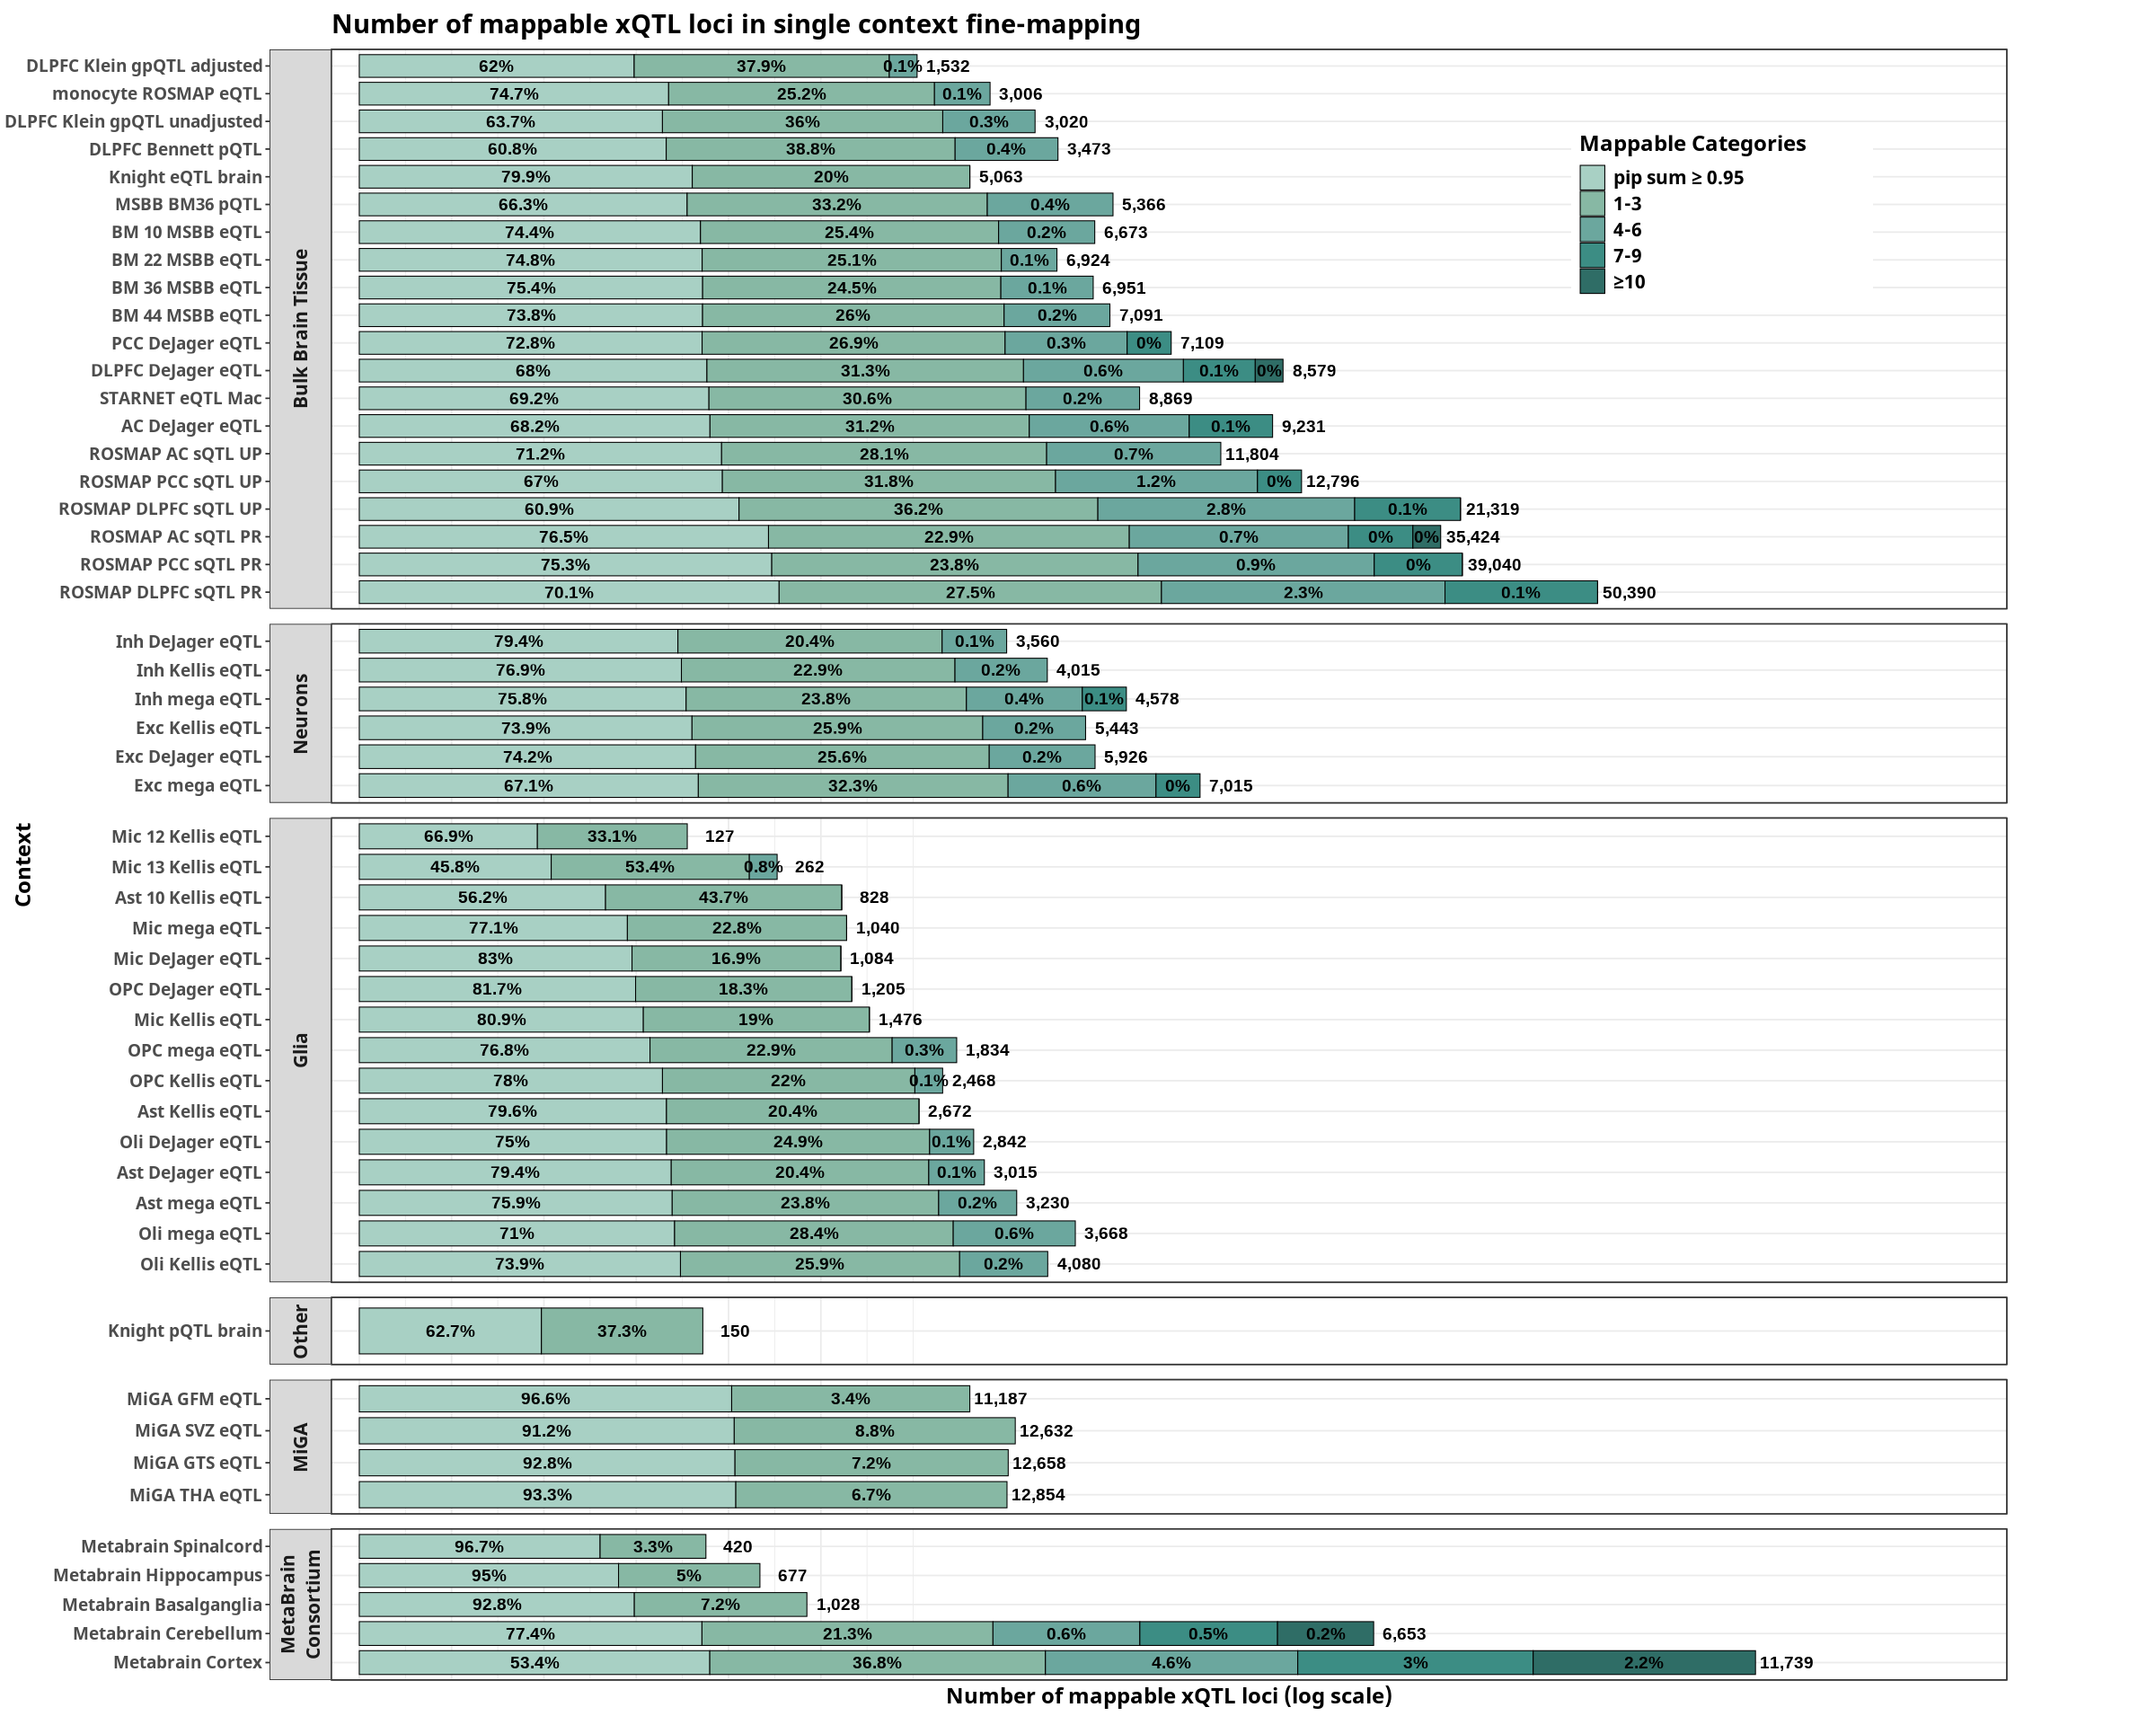

In [88]:


options(repr.plot.width = 20, repr.plot.height = 16)

# Create the mappable plot
p2 <- ggplot(mappable_data,
             aes(x = log_gene_count,
                 y = reorder(display_resource, rank_in_group),
                 fill = n_mappable_category)) +

  geom_bar(stat = "identity", position = "stack", width = 0.82, color = "black", size = 0.3) +
  
  # Only label segments that are large enough in log space
  geom_text(aes(label = ifelse(gene_count > 0 & log_gene_count > 0.01, paste0(round(percentage, 2), "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 5, fontface = "bold", lineheight = 0.9) +
  
  geom_text(data = bar_end_positions_mappable,
            aes(x = x_end,
                y = reorder(display_resource, rank_in_group),
                label = format(total_count, big.mark = ",")),
            inherit.aes = FALSE,
            hjust = -0.1,
            size = 5,
            fontface = "bold",
            color = "black") +
  
  scale_fill_manual(
    values = rev(color_palette),
    name = "Mappable Categories", 
    labels = rev(c("pip sum ≥ 0.95", "1-3", "4-6", "7-9", "≥10")),
    guide = guide_legend(reverse = TRUE)
  ) +
  
  facet_grid(tissue_group ~ ., scales = "free_y", space = "free_y", switch = "y") +
  
  labs(
    title = "Number of mappable xQTL loci in single context fine-mapping",
    x = "Number of mappable xQTL loci (log scale)",   
    y = "Context"
  ) +
  
  scale_x_continuous(
    breaks = log10(10^(0:5)),
    labels = c("1","10","100","1,000","10,000","100,000"),
    expand = expansion(mult = c(0.02, 0.18)),
    limits = c(0, NA)
  ) +
  
  theme_bw(base_size = 11) +
  theme(
    text = element_text(family = "Noto Sans", size = 18, face = "bold"),
    legend.position = c(0.83, 0.9),
    axis.title.x = element_text(size = 18, face = "bold"),
    axis.text.x = element_blank(),   # Remove x-axis text
    axis.ticks.x = element_blank(),  # Remove x-axis ticks
    axis.title.y = element_text(size = 18, face = "bold", margin = margin(r = -70)),
    legend.title = element_text(size = 18, face = "bold"),  
    legend.text = element_text(size = 16, face = "bold"),  
    strip.text.y = element_text(size = 16, face = "bold"),
    panel.spacing.y = unit(0.7, "lines"),
    plot.margin = margin(t = 10, r = 100, b = 10, l = 10)
  ) +
  
  coord_cartesian(clip = "off")

p2 <- p2 + force_panelsizes(rows = c(5, 1.6, 4.15, 0.6, 1.2, 1.35))

print(p2)

## Supplementary Figure


### Frequency of Events in Distance Category

#### Load libraries

In [29]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(showtext)
font_add_google("Noto Sans", "Noto Sans")
showtext_auto()

#### Load and prepare data

In [31]:
top_loci_integrated_distance_summary <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_S1/Figure_S1_P1.rds") #FIXME

singlecontext_top_loci_table_integrated_distance_filtered_category <- top_loci_integrated_distance_summary %>% 
                                                                      filter(cs_coverage_0.95!=0) %>%
                                                                      mutate(distance_category = case_when(distance < 10e3 ~ "<10Kb",
                                                                                                           distance >= 10e3 & distance < 50e3 ~ "10Kb~50Kb",
                                                                                                           distance >= 50e3 & distance < 100e3 ~ "50Kb~100Kb",
                                                                                                           distance >= 100e3 & distance < 1e6 ~ "100Kb~1Mb",
                                                                                                           distance >= 1e6 ~ ">1Mb"),
                                                                       distance_category = factor(distance_category, levels = c("<10Kb", "10Kb~50Kb", "50Kb~100Kb", "100Kb~1Mb", ">1Mb")))

# Group by context and distance category, then calculate frequency
singlecontext_top_loci_table_integrated_distance_filtered_category <- singlecontext_top_loci_table_integrated_distance_filtered_category %>%
                                                                      group_by(resource, distance_category) %>%
                                                                      summarise(count = n(), .groups = "drop") %>%
                                                                      group_by(resource) %>%
                                                                      mutate(frequency = count / sum(count))

# Define the order of categories for the x-axis
singlecontext_top_loci_table_integrated_distance_filtered_category$context <- factor(singlecontext_top_loci_table_integrated_distance_filtered_category$resource, levels = unique(singlecontext_top_loci_table_integrated_distance_filtered_category$resource))

head(singlecontext_top_loci_table_integrated_distance_filtered_category)

resource,distance_category,count,frequency,context
<chr>,<fct>,<int>,<dbl>,<fct>
AC_DeJager_eQTL,<10Kb,4404,0.42728243,AC_DeJager_eQTL
AC_DeJager_eQTL,10Kb~50Kb,3628,0.35199379,AC_DeJager_eQTL
AC_DeJager_eQTL,50Kb~100Kb,1040,0.10090230,AC_DeJager_eQTL
AC_DeJager_eQTL,100Kb~1Mb,1050,0.10187251,AC_DeJager_eQTL
AC_DeJager_eQTL,>1Mb,185,0.01794897,AC_DeJager_eQTL
Ast_10_Kellis_eQTL,<10Kb,25,0.03434066,Ast_10_Kellis_eQTL


In [32]:
singlecontext_top_loci_table_integrated_distance_filtered_category <- singlecontext_top_loci_table_integrated_distance_filtered_category %>%
  mutate(
    # First rename the resources
    #resource = case_when(
    #  grepl("DeJager", resource) ~ gsub("DeJager", "CUIMC1", resource),
    #  grepl("Kellis", resource) ~ gsub("Kellis", "MIT", resource),
    #  TRUE ~ resource
    #),
    # Then apply tissue grouping
    tissue_group = case_when(
      grepl("STARNET|ROSMAP|PCC|DLPFC|MSBB|Knight.*eQTL.*brain|AC.*CUIMC1|BM.*MSBB|PCC.*CUIMC1", resource) ~ "Bulk Brain Tissue",
      grepl("Inh|Exc", resource) ~ "Neurons",
      grepl("Knight.*pQTL|DLPFC.*Klein", resource) ~ "Other Modalities",
      grepl("MIGA|MiGA", resource) ~ "MiGA",
      grepl("Metabrain", resource) ~ "MetaBrain \nConsortium",
      TRUE ~ "Glia"
    )
  )


# Create ordering within each tissue group (descending by total count)
group_totals <- singlecontext_top_loci_table_integrated_distance_filtered_category %>%
  group_by(resource) %>%
  summarise(total_count = sum(count)) %>%
  ungroup()

singlecontext_top_loci_table_integrated_distance_filtered_category <- singlecontext_top_loci_table_integrated_distance_filtered_category %>%
  left_join(group_totals, by = "resource") %>%
  group_by(tissue_group) %>%
  arrange(desc(total_count), .by_group = TRUE) %>%
  mutate(rank_in_group = dense_rank(desc(total_count))) %>%
  ungroup()

head(singlecontext_top_loci_table_integrated_distance_filtered_category)


resource,distance_category,count,frequency,context,tissue_group,total_count,rank_in_group
<chr>,<fct>,<int>,<dbl>,<fct>,<chr>,<int>,<int>
ROSMAP_DLPFC_sQTL_PR,<10Kb,1499,0.09127999,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1
ROSMAP_DLPFC_sQTL_PR,10Kb~50Kb,1751,0.10662526,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1
ROSMAP_DLPFC_sQTL_PR,50Kb~100Kb,796,0.04847156,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1
ROSMAP_DLPFC_sQTL_PR,100Kb~1Mb,6732,0.40993789,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1
ROSMAP_DLPFC_sQTL_PR,>1Mb,5644,0.34368530,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1
STARNET_eQTL_Mac,<10Kb,4320,0.37643778,STARNET_eQTL_Mac,Bulk Brain Tissue,11476,2


In [78]:
# Plot settings
color_palette <- c("#a8d0c4", "#87b8a4", "#6ba79e", "#3c8d84", "#2f6d66")
#color_palette <- c("#1f77b4","#2ca02c","#ff7f0e","#d62728","#9467bd")

In [34]:
p1<- ggplot(singlecontext_top_loci_table_integrated_distance_filtered_category, aes(x = reorder(resource, -rank_in_group), y = frequency, fill = distance_category)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(
    values = rev(color_palette), 
    name = "Distance", 
    labels = rev(c("< 10Kb", "10Kb ~ 50Kb", "50Kb ~ 100Kb", "100Kb ~ 1Mb", "≥ 1Mb")),
    guide = guide_legend(reverse = TRUE)
  ) + 
  labs(
    title = "Frequency of Events in Distance Category",
    x = "Context",
    y = "Frequency"
  ) +
  facet_grid(~ tissue_group, scales = "free_x", space = "free_x") +
  theme_minimal(base_family = "Noto Sans") +
  theme(
    axis.text.x = element_text(angle = 60, hjust = 1, size = 18, color = "black"),
    plot.title = element_text(hjust = 0.5, size = 25, face = "bold"),
    axis.title = element_text(size = 25, face = "bold", color = "black"),
    axis.text.y = element_text(size = 20, margin = margin(l = 20), color = "black"),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18),
    strip.text = element_text(size = 22, face = "bold"),
    plot.margin = margin(1, 1, 1, 1, "cm")
  )


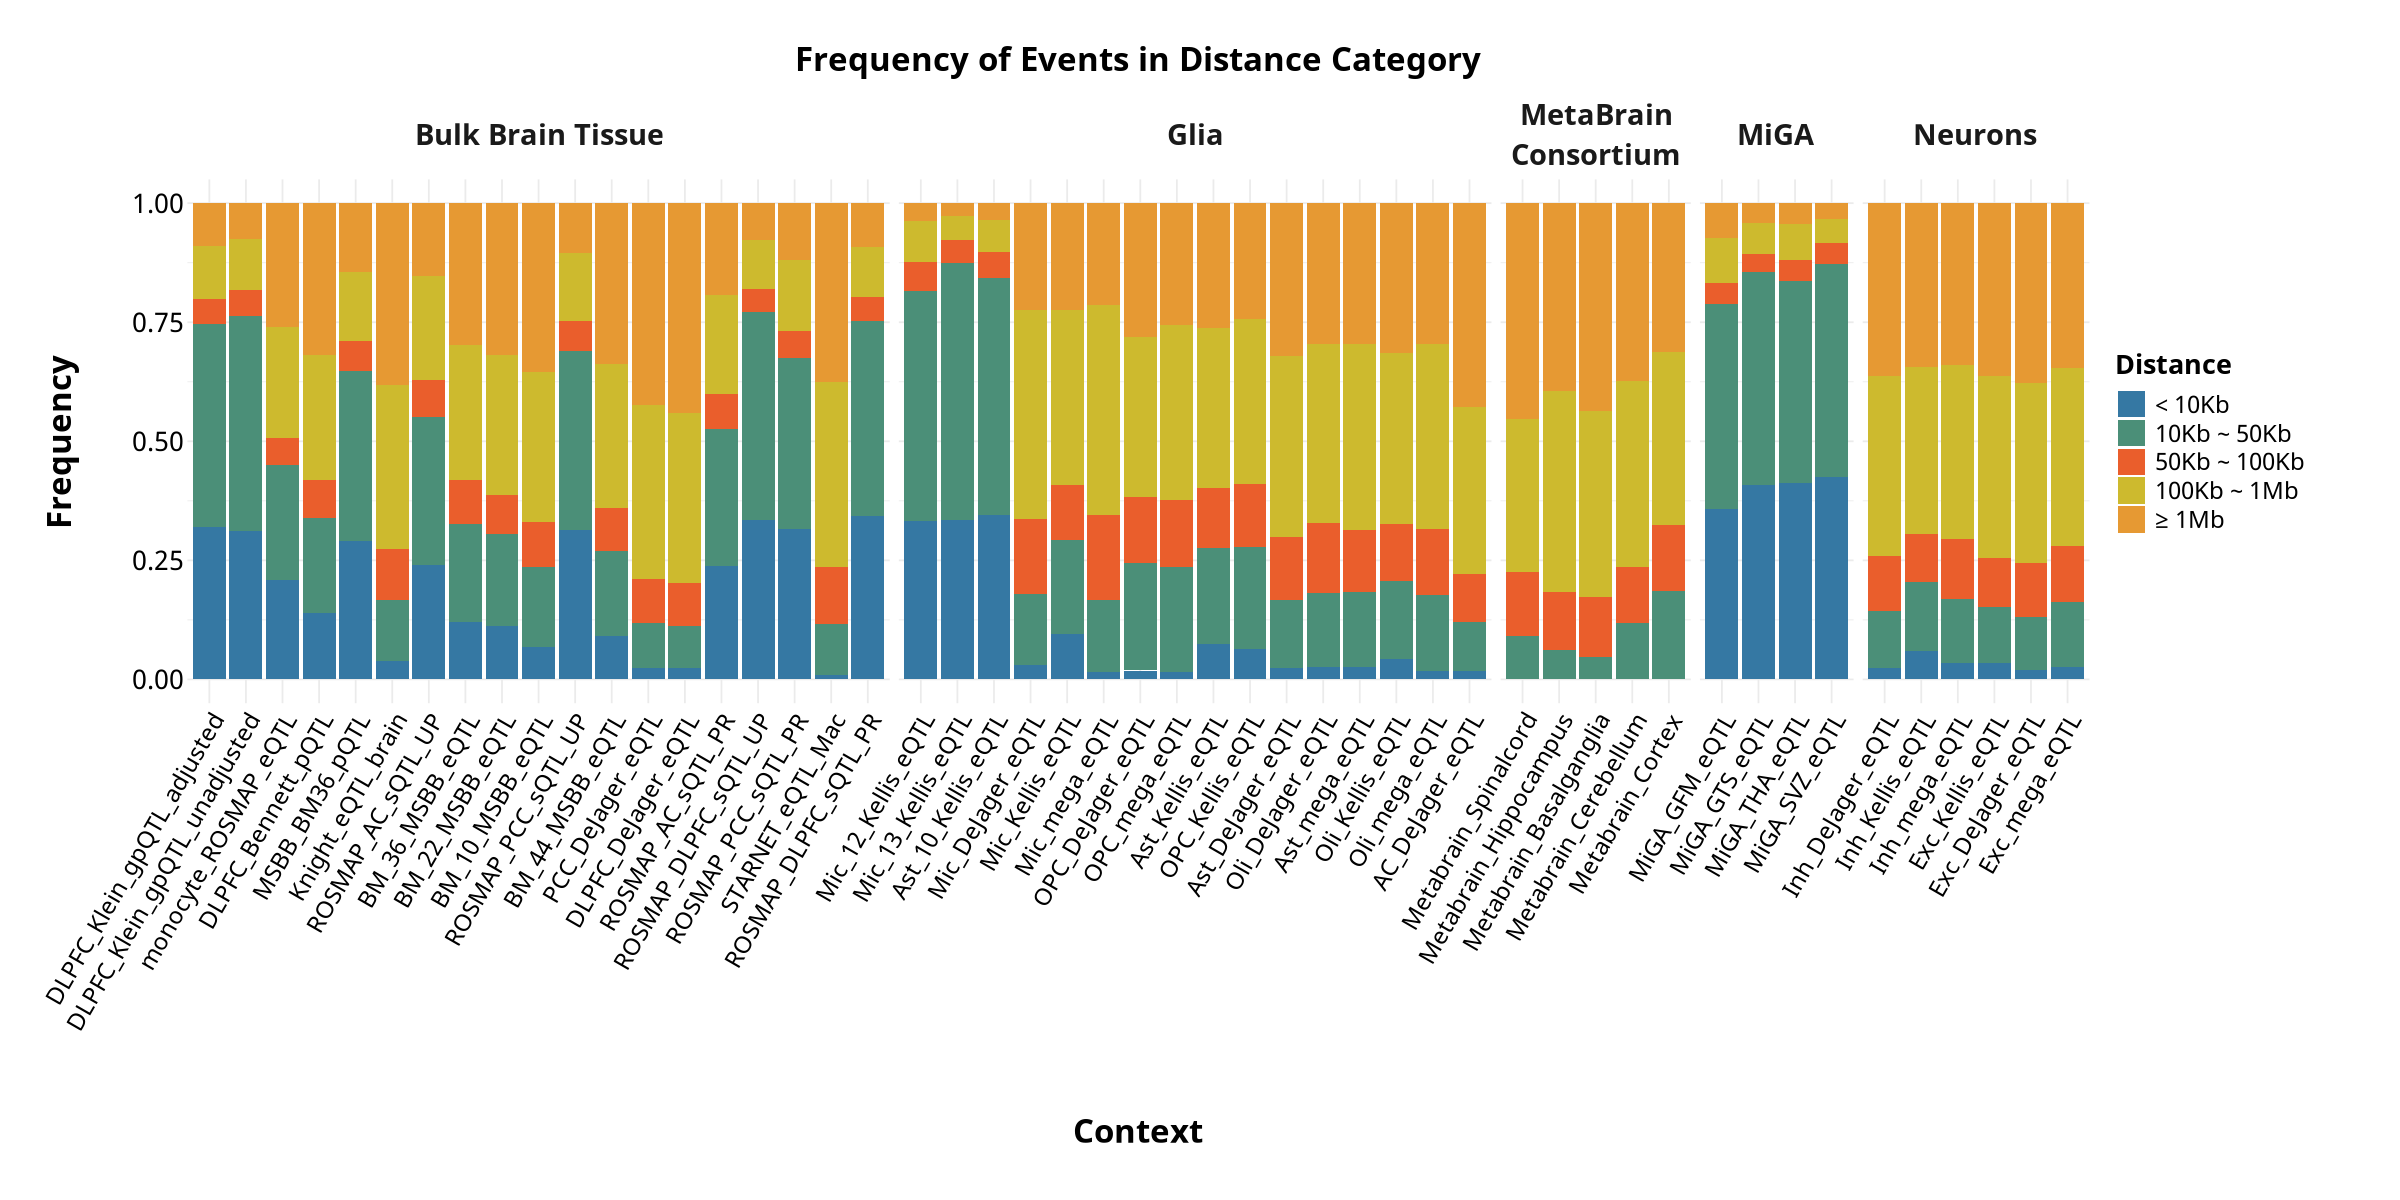

In [35]:
options(repr.plot.width = 20, repr.plot.height = 10)
p1

### Polish Version

In [90]:
singlecontext_top_loci_table_integrated_distance_filtered_category$display_resource <- gsub("_", " ", singlecontext_top_loci_table_integrated_distance_filtered_category$resource)
head(singlecontext_top_loci_table_integrated_distance_filtered_category)

resource,distance_category,count,frequency,context,tissue_group,total_count,rank_in_group,display_resource
<chr>,<fct>,<int>,<dbl>,<fct>,<chr>,<int>,<int>,<chr>
ROSMAP_DLPFC_sQTL_PR,<10Kb,1499,0.09127999,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1,ROSMAP DLPFC sQTL PR
ROSMAP_DLPFC_sQTL_PR,10Kb~50Kb,1751,0.10662526,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1,ROSMAP DLPFC sQTL PR
ROSMAP_DLPFC_sQTL_PR,50Kb~100Kb,796,0.04847156,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1,ROSMAP DLPFC sQTL PR
ROSMAP_DLPFC_sQTL_PR,100Kb~1Mb,6732,0.40993789,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1,ROSMAP DLPFC sQTL PR
ROSMAP_DLPFC_sQTL_PR,>1Mb,5644,0.34368530,ROSMAP_DLPFC_sQTL_PR,Bulk Brain Tissue,16422,1,ROSMAP DLPFC sQTL PR
STARNET_eQTL_Mac,<10Kb,4320,0.37643778,STARNET_eQTL_Mac,Bulk Brain Tissue,11476,2,STARNET eQTL Mac


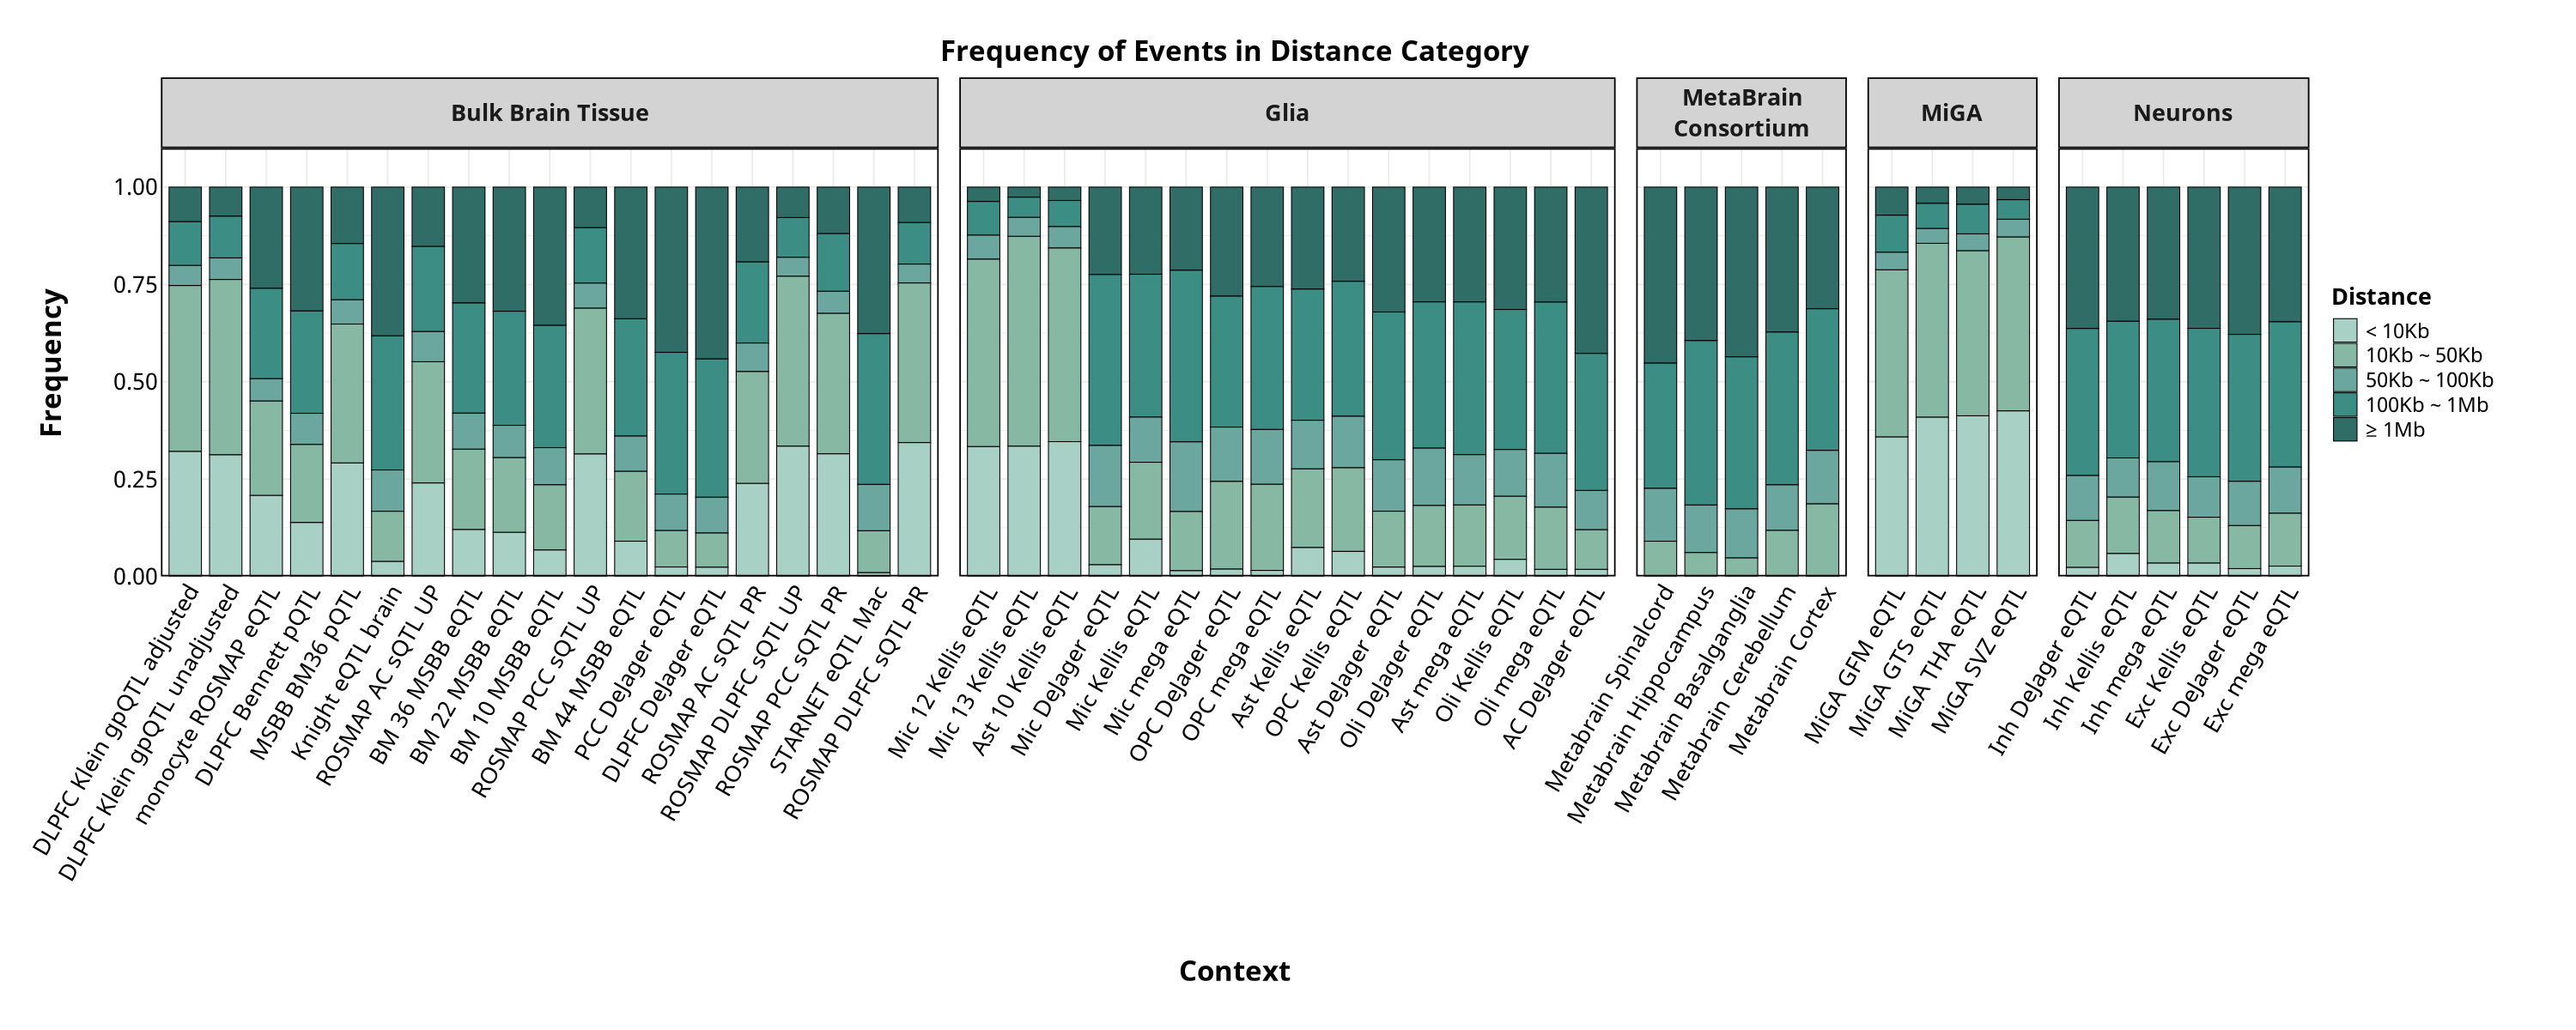

In [91]:
options(repr.plot.width = 25, repr.plot.height = 10)
p1 <- ggplot(singlecontext_top_loci_table_integrated_distance_filtered_category, 
             aes(x = reorder(display_resource, -rank_in_group), y = frequency, fill = distance_category)) +
  geom_bar(stat = "identity", position = "stack", color = "black", size = 0.3, width = 0.8) +  # Increased width for closer bars
  # Add total count labels on top of bars
  #geom_text(aes(label = total_count, y = 1.02), 
  #          vjust = 0, size = 5, fontface = "bold", color = "black") +
  scale_fill_manual(
    values = rev(color_palette), 
    name = "Distance", 
    labels = rev(c("< 10Kb", "10Kb ~ 50Kb", "50Kb ~ 100Kb", "100Kb ~ 1Mb", "≥ 1Mb")),
    guide = guide_legend(reverse = TRUE)
  ) + 
  labs(
    title = "Frequency of Events in Distance Category",
    x = "Context",
    y = "Frequency"
  ) +
  facet_grid(~ tissue_group, scales = "free_x", space = "free_x") +
  theme_minimal(base_family = "Noto Sans") +
  theme(
    axis.text.x = element_text(angle = 60, hjust = 1, size = 20, color = "black"),
    plot.title = element_text(hjust = 0.5, size = 25, face = "bold"),
    axis.title = element_text(size = 25, face = "bold", color = "black"),
    axis.text.y = element_text(size = 20, margin = margin(l = 20), color = "black"),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18),
    strip.text = element_text(size = 20, face = "bold"),
    plot.margin = margin(1, 1, 1, 1, "cm"),
    # Adjust facet spacing - reduce space between bars in same group
    panel.spacing = unit(1, "lines"),  # Increased space between facets
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    strip.background = element_rect(color = "black", fill = "lightgray", size = 1)
  ) +
  # Expand y-axis to make room for total count labels
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))

print(p1)